<h1><center>Bank Telemarketing Campaign</center></h1>

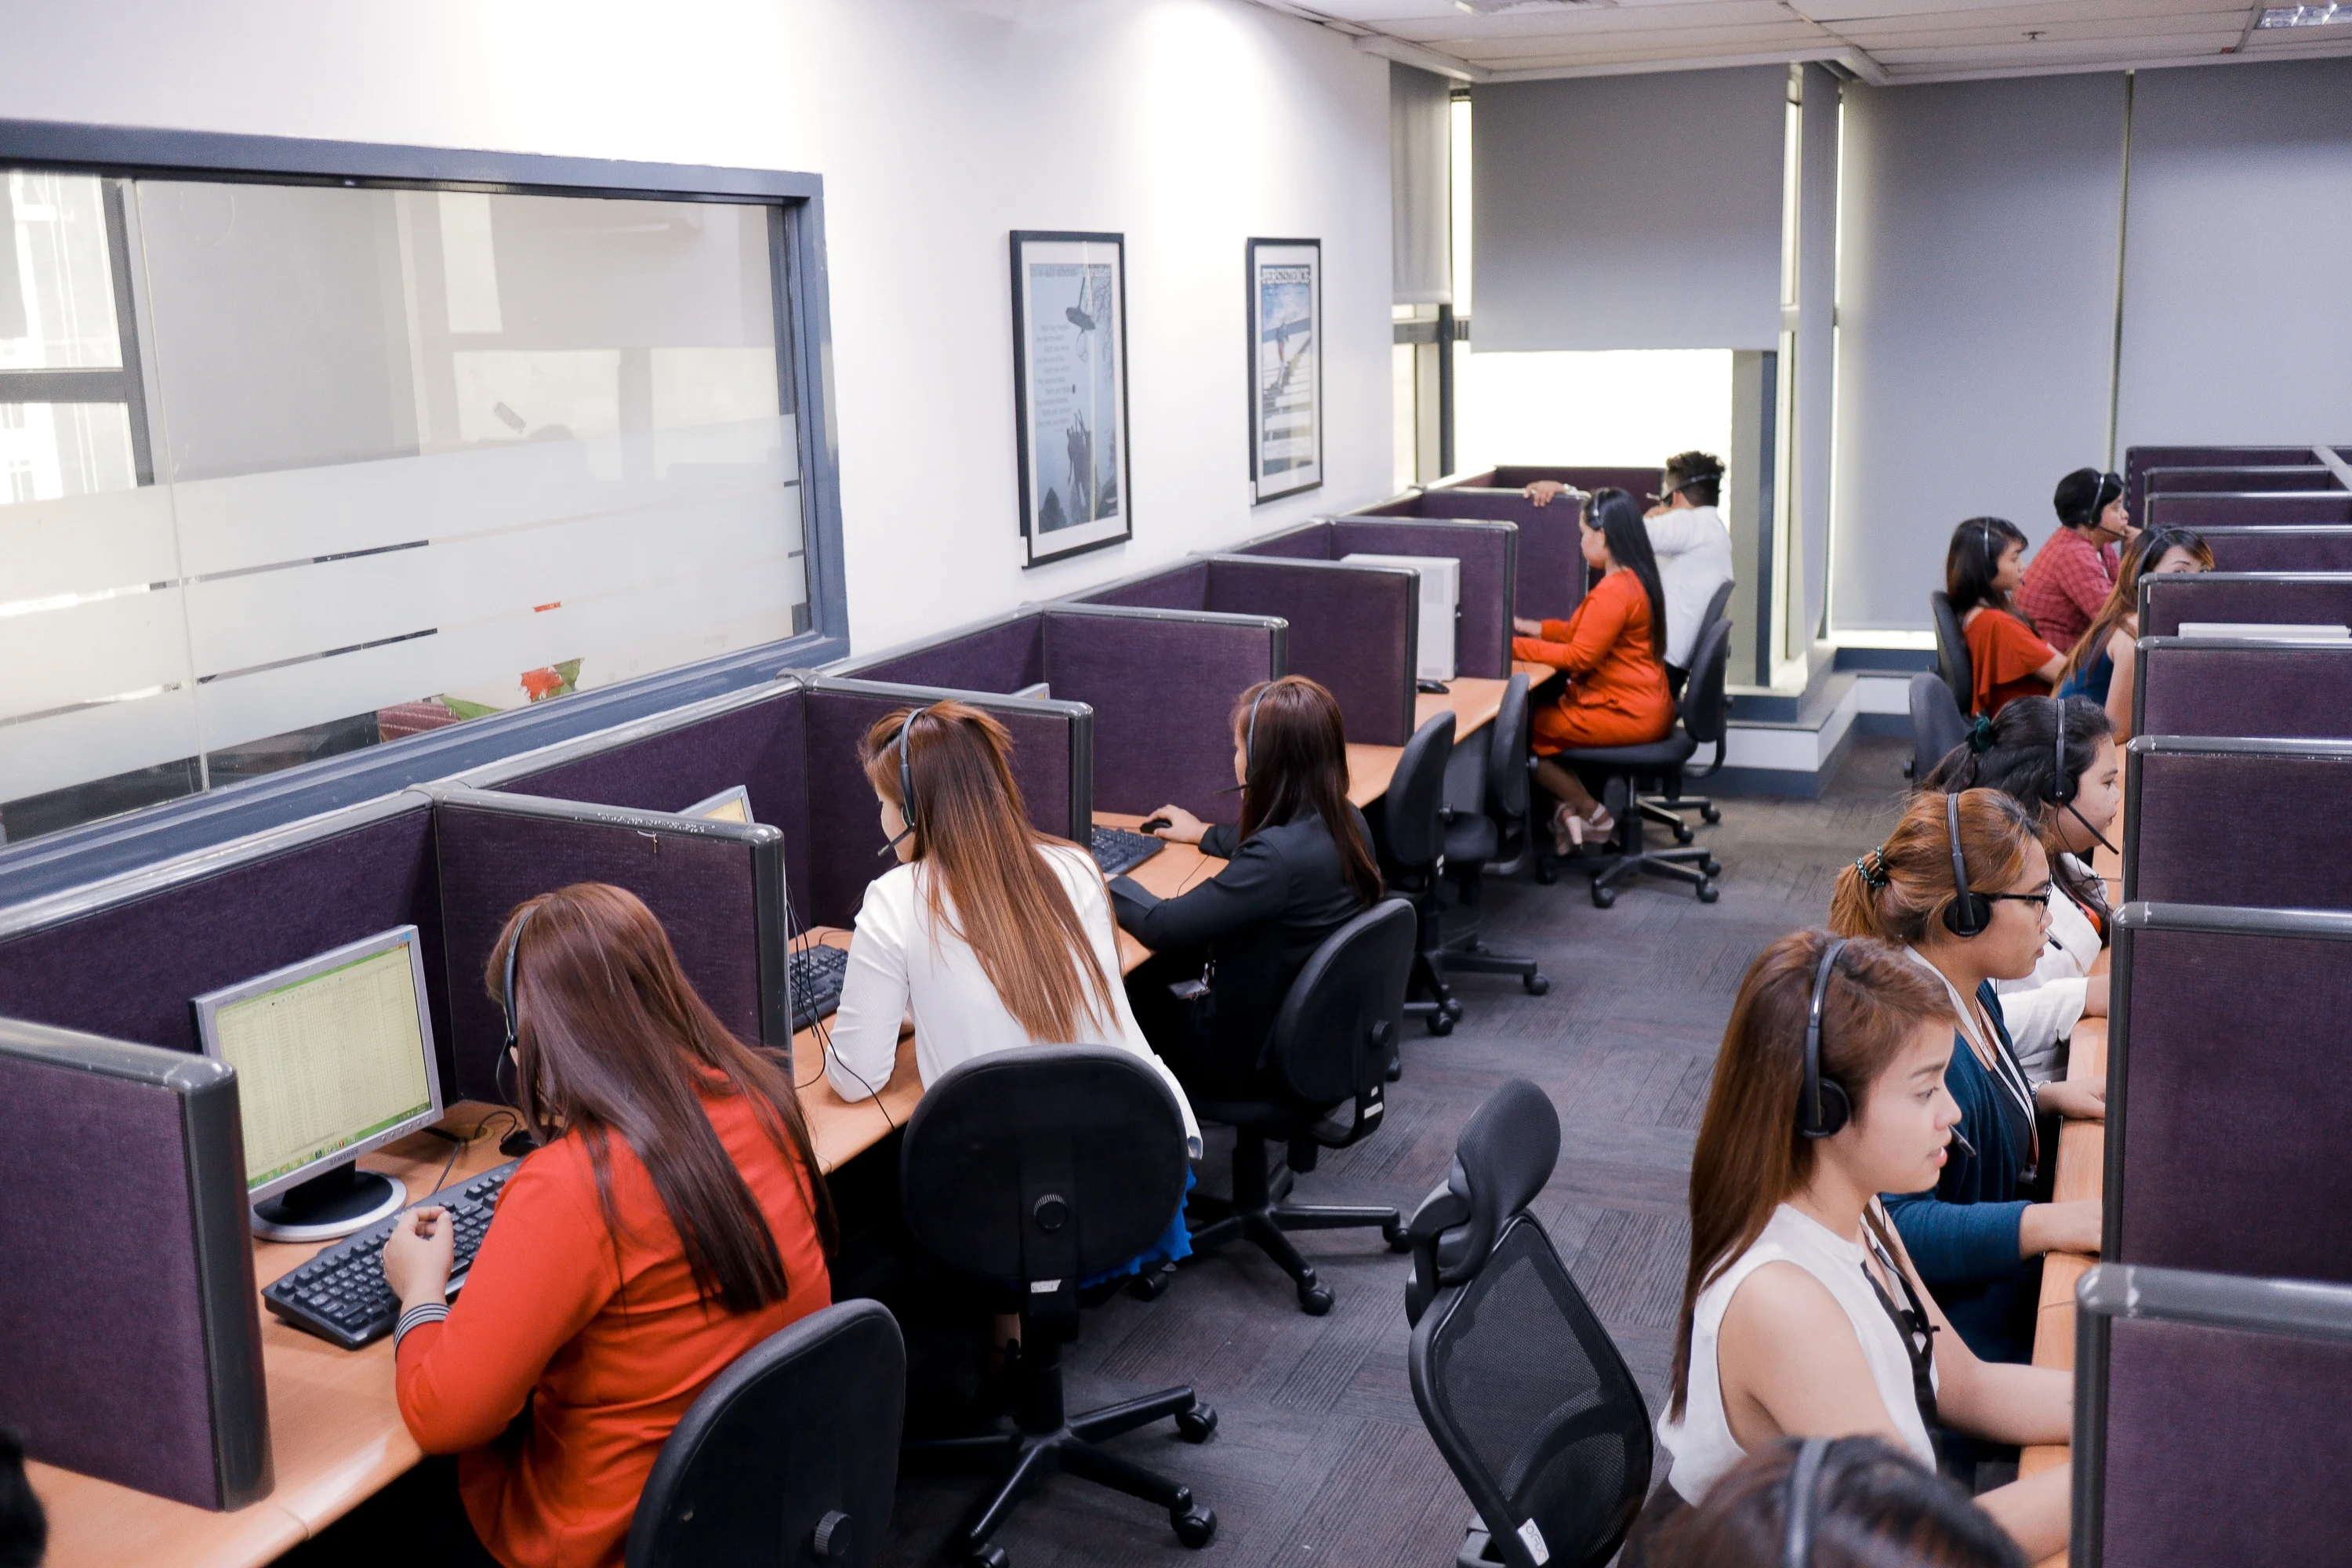

# problem statement

### Background:
The bank aims to enhance its revenue by conducting a cost-efficient telemarketing campaign for term deposits among existing customers. Term deposits, fixed investments with predetermined interest rates, serve to foster long-term customer relationships. The objective is to conduct an end-to-end Exploratory Data Analysis (EDA) on the campaign dataset, identifying patterns and providing insights to improve the positive response rate. The analysis will involve examining customer demographics, temporal trends, and other factors influencing the success of the campaign, ultimately offering recommendations for targeted improvements in the bank's marketing strategy.

### objectives:
. The objective is to conduct an end-to-end Exploratory Data Analysis (EDA) on the campaign dataset, identifying patterns and providing insights to improve the positive response rate. 

### Dataset:
#.Customer id : This column is about the id of the customer contacted

#.age	: This column consists of the age of each customer

#.salary: This column represents monthly salary of the customer

#.balance: This column represents the cash balance in the bank account of the customer

#.marital:  This column consists of the information about the marital status of each customer.

#.jobedu: This column consists of the information about the job and education of each cutomer

#.default: This column consists of two categorical variables ‘yes’ & ‘no’

#.housing: This column consists of two categorical variables ‘yes’ & ‘no’

#.loan : This column consists of the two categorical variables ‘yes’ & ‘no’

#.contact: This column provides the information on the means through which the customer has been contacted either ‘cellular’ , ‘telephone’ and ‘unknown’ represents no information.

.#day: day of month on which a particular customer is contacted

#.month: This column provides the detail of month in which the customer is contacted during the campaign

#.duration : This column represents the total call duration of each customer 

#.campaign: This column is the number of campaign in which customer is contacted.

#.pdays: This column represents  the no of days passed by since the customer has been reached via bank for any of the other .products (not term deposit).

#.previous: This column represents the no of times the customer has been reached in the previous campaigns or for any of the other products(not term deposit)

#.poutcomes :This column represents the outcome of the previous reach outs for any of the products(other than term deposits) provided by banks                                                                                                    Unknown - This represents that the customer has not been reached so far       Success - This represents that the previous call was a successful conversion of the customer                                                                                                                Failure - This represents that the customer is not interested in the last product                                                                                                                                                      Other -  This represents that during the previous call, the customer has not given any definite answer

#.response: This column represents whether the customer has opened the term deposit account or not

# .Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
bank=pd.read_csv(r"C:\Users\pc\OneDrive\Documents\bank_marketing_updated_v2.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=bank.copy()

#### View the first and last 5 rows of the dataset. 

In [4]:
data.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [5]:
data.tail()

customerid   age  salary  balance   marital                  jobedu  \
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month  \
45206      yes      no      no   no   cellular   17  nov, 2017   
45207      yes      no      no   no   cellular   17  nov, 2017   
45208      yes      no      no   no   cellular   17  nov, 2017   
45209      yes      no      no   no  telephone   17  nov, 2017   
45210      yes      no      no   no   cellular   17  nov, 2017   

                   duration  campaign  pdays  previous poutcome response  
45206  16.2833333333333 min         3     -1         0  unknown      yes  
45207               7.6 min         2     -1         0  unknown      yes  
45208  18.7833333333333 min         5    184         3  success      yes  
45209  8.46666666666667 min         4     -1         0  unknown       no  
45210  6.01666666666667 min         2    188        11    other       no

### shape of dataset 

In [6]:
data.shape
#rows = 45211
#columns=19

(45211, 19)

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

 converting "objects" to "category" reduces the data space required to store the dataframe

## fixing the data types

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['marital', 'jobedu', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'poutcome', 'response'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   customerid  45211 non-null  int64   
 1   age         45191 non-null  float64 
 2   salary      45211 non-null  int64   
 3   balance     45211 non-null  int64   
 4   marital     45211 non-null  category
 5   jobedu      45211 non-null  category
 6   targeted    45211 non-null  category
 7   default     45211 non-null  category
 8   housing     45211 non-null  category
 9   loan        45211 non-null  category
 10  contact     45211 non-null  category
 11  day         45211 non-null  int64   
 12  month       45161 non-null  category
 13  duration    45211 non-null  category
 14  campaign    45211 non-null  int64   
 15  pdays       45211 non-null  int64   
 16  previous    45211 non-null  int64   
 17  poutcome    45211 non-null  category
 18  response    45181 non-null  category
dtypes: c

we can see that the memory usage has decreased from 6.6+ MB to 3.4 MB, this technique is generally useful for bigger datasets

### finding null values.

In [11]:
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

## fixing null values

In [12]:
#median imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data['age'] =imputer.fit_transform(data[['age']])

In [13]:
#MONTH(USING MODE)-----use for discrete data
data['month'].fillna(data['month'].mode()[0],inplace=True)

In [14]:
#RESPONSE(USING MODE)
data['response'].fillna(data['response'].mode()[0],inplace=True)

In [15]:
data.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

##### as we can seen that there is  no null value in our dataset.
The benefit of using fillna() or fillna() by mode is that it can preserve the original distribution of the data.

# summary of dataset

In [16]:
data.describe().T

count          mean           std     min      25%      50%  \
customerid  45211.0  22606.000000  13051.435847     1.0  11303.5  22606.0   
age         45211.0     40.934795     10.616926    18.0     33.0     39.0   
salary      45211.0  57006.171065  32085.718415     0.0  20000.0  60000.0   
balance     45211.0   1362.272058   3044.765829 -8019.0     72.0    448.0   
day         45211.0     15.806419      8.322476     1.0      8.0     16.0   
campaign    45211.0      2.763841      3.098021     1.0      1.0      2.0   
pdays       45211.0     40.197828    100.128746    -1.0     -1.0     -1.0   
previous    45211.0      0.580323      2.303441     0.0      0.0      0.0   

                75%       max  
customerid  33908.5   45211.0  
age            48.0      95.0  
salary      70000.0  120000.0  
balance      1428.0  102127.0  
day            21.0      31.0  
campaign        3.0      63.0  
pdays          -1.0     871.0  
previous        0.0     275.0

* customerid is an ID variable and not useful for predictive modelling.

* Age of the customers range from 0 to 95 years and the average age is 39 years.

* There is no columns that contain all the values same,so it cannot be dropped as it will adding information in our analysis.

* Balance and pdays has a high range and the difference in mean and median indicate the presence of outliers.

* There is some scaling issue in our dataset.

In [17]:
data.describe(include=['category']).T

count unique                  top   freq
marital   45211      3              married  27214
jobedu    45211     48  management,tertiary   7801
targeted  45211      2                  yes  37091
default   45211      2                   no  44396
housing   45211      2                  yes  25130
loan      45211      2                   no  37967
contact   45211      3             cellular  29285
month     45211     12            may, 2017  13797
duration  45211   2646              1.5 min    138
poutcome  45211      4              unknown  36959
response  45211      2                   no  39924

* Default is our target variable with 98% records 'No'.

* Most jobedu is management and tertiary.

* DURATION has the most unique values i.e 2646.

### Dropping columns which are not adding any information.

In [18]:
data.drop(['customerid'],axis=1,inplace=True)

In [19]:
data.head()

age  salary  balance  marital                  jobedu targeted default  \
0  58.0  100000     2143  married     management,tertiary      yes      no   
1  44.0   60000       29   single    technician,secondary      yes      no   
2  33.0  120000        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000     1506  married     blue-collar,unknown       no      no   
4  33.0       0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

###  Drop outliers in the column 'balance'

In [20]:
from scipy.stats import zscore

data[['balance']].mean()
data[['balance']].mean()

data['balance_outliers'] = data['balance']
data['balance_outliers']= zscore(data['balance_outliers'])

condition1 = (data['balance_outliers']>3) | (data['balance_outliers']<-3 )
dataset = data.drop(data[condition1].index, axis = 0, inplace = False)

In [21]:
dataset1 = dataset.drop('balance_outliers', axis=1)

In [22]:
# Change the unit of 'duration' from seconds to minutes

In [23]:
#convert the duration variable into single unit minutes. and remove the sec or min prefix.
dataset1.duration=dataset1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [24]:
# Change 'month' from words to numbers for easier analysis
lst = [dataset1]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

 #### Change column name: 'y' to 'response'

In [25]:
dataset1.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset1, new_column, old_column):
    dataset1[new_column] = dataset1[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset1[new_column].value_counts()

convert(dataset1, "response_binary", "response")

response_binary
0    39300
1     5166
Name: count, dtype: int64

### Let's look at the unique values of all the categories

In [26]:
cols_cat= dataset1.select_dtypes(['category'])

In [27]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in marital are :
marital
married     26729
single      12591
divorced     5146
Name: count, dtype: int64
**************************************************
Unique values in jobedu are :
jobedu
management,tertiary        7564
blue-collar,secondary      5320
technician,secondary       5173
admin.,secondary           4174
blue-collar,primary        3731
services,secondary         3435
technician,tertiary        1922
management,secondary       1102
retired,secondary           959
self-employed,tertiary      805
retired,primary             778
unemployed,secondary        715
entrepreneur,tertiary       663
housemaid,primary           619
self-employed,secondary     566
admin.,tertiary             566
entrepreneur,secondary      537
student,secondary           501
blue-collar,unknown         451
housemaid,secondary         384
retired,tertiary            355
services,primary            344
management,primary          288
unemployed,tertiary         284
unemployed,primary       

In [28]:
df=dataset.copy

# <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

#  * univariate,bivariate & catagorical variable analysis

## marital 

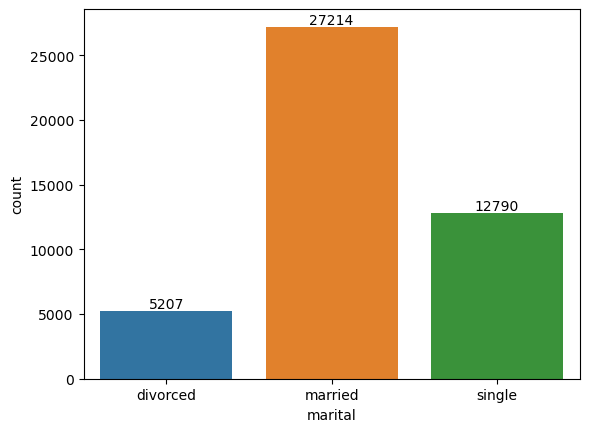

In [29]:
ax = sns.countplot(x='marital',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

## marital and salary. 

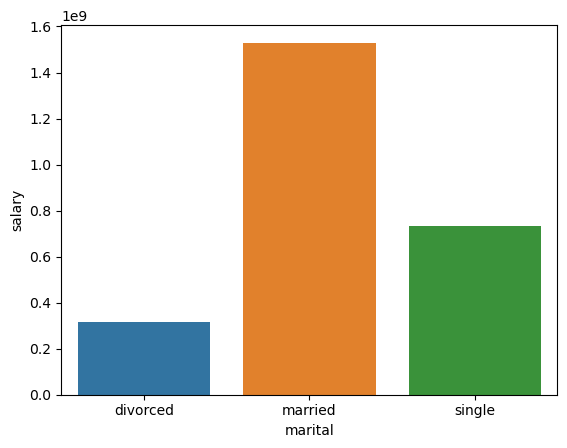

In [30]:
sal_marital=data.groupby(['marital'], as_index=False)['salary'].sum().sort_values(by='salary',ascending=False)

sns.barplot(x='marital',y='salary',data=sal_marital)

for bars in ax.containers:
    ax.bar_label(bars)

* from above graphs we can see that the most number of customers are married and the salary of total married customers are also high in comparison to single $ divorced customers

## Age  

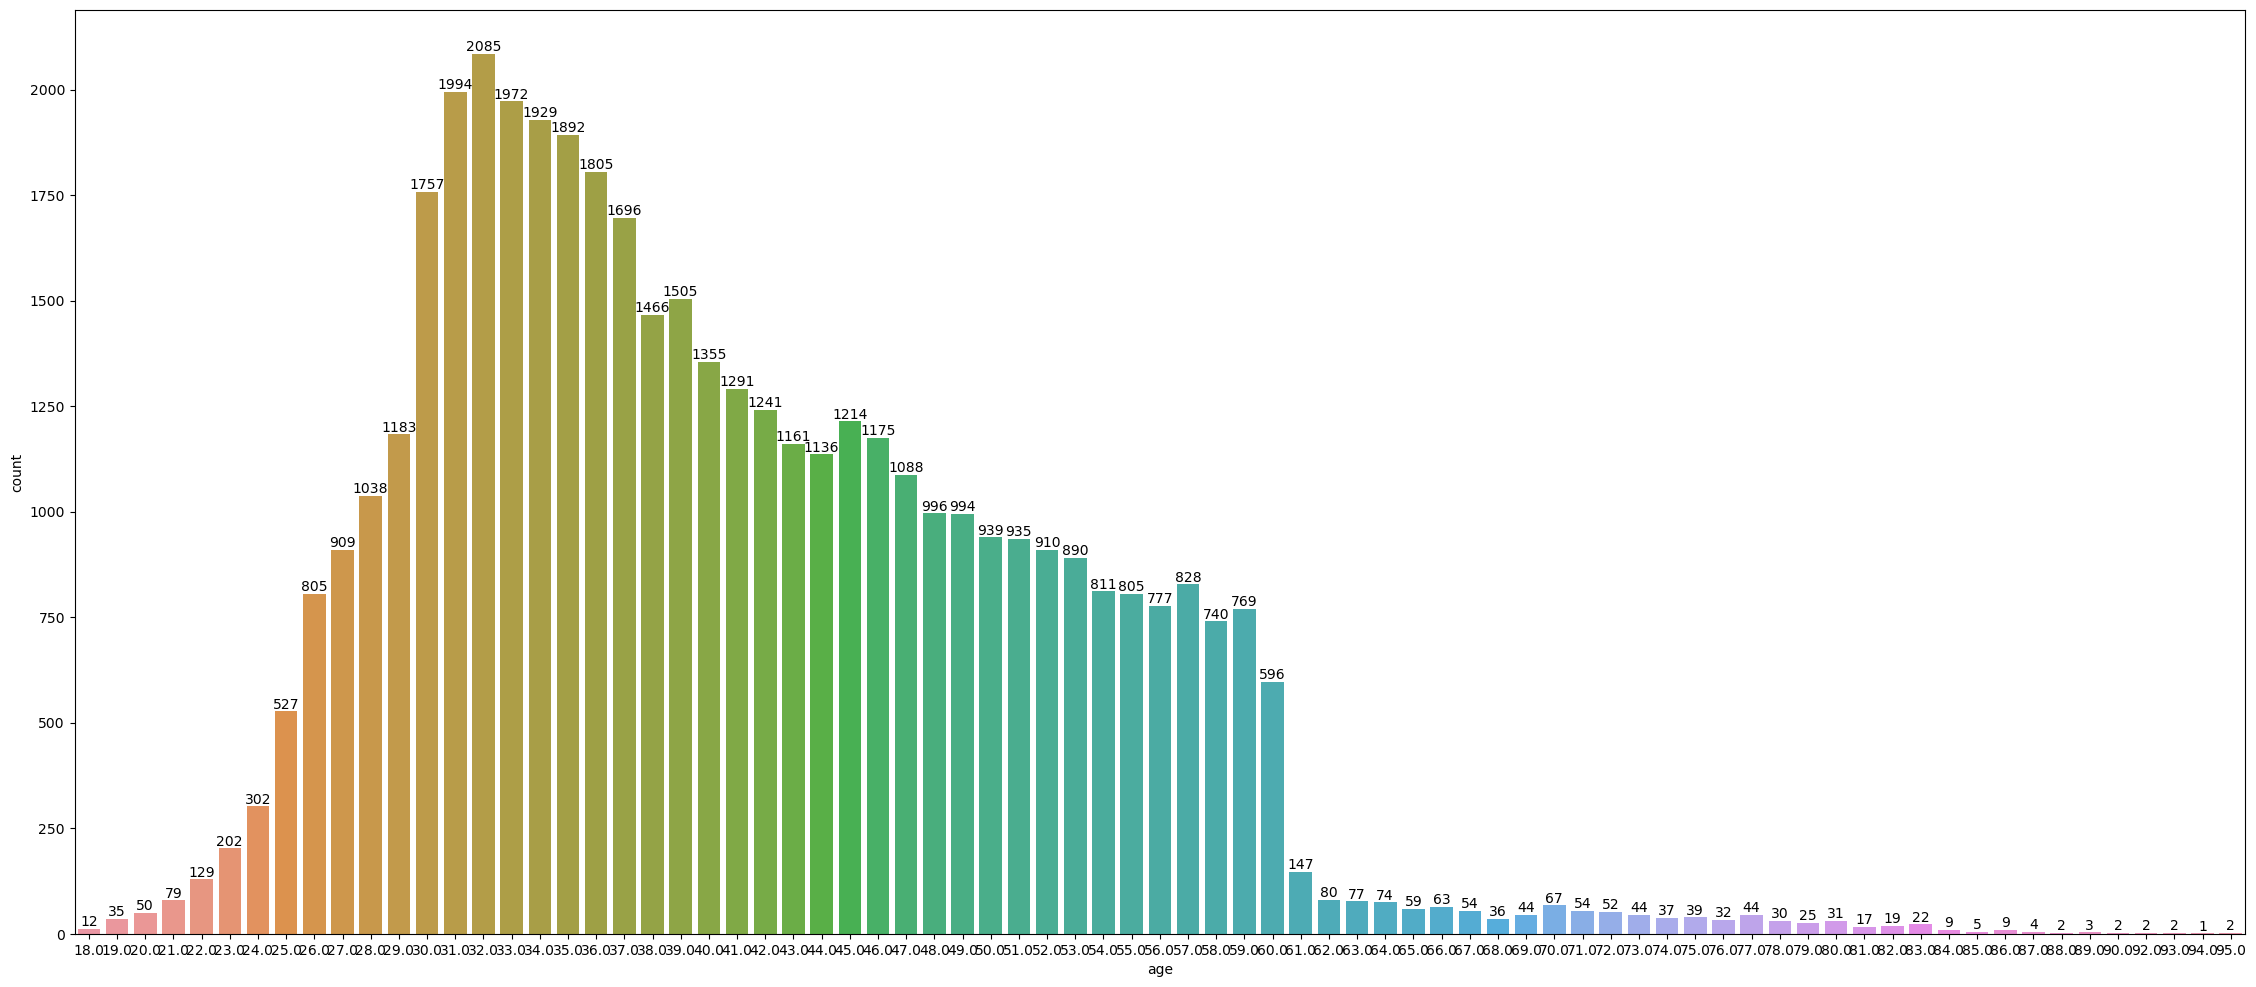

In [31]:
plt.figure(figsize=(28,12))
ax=sns.countplot(data=data,x='age')

for bars in ax.containers:
    ax.bar_label(bars)

most number of customer are of age between 30 to 40 ,and most count of customer's age is 32,i.e=2085

# jobedu and age

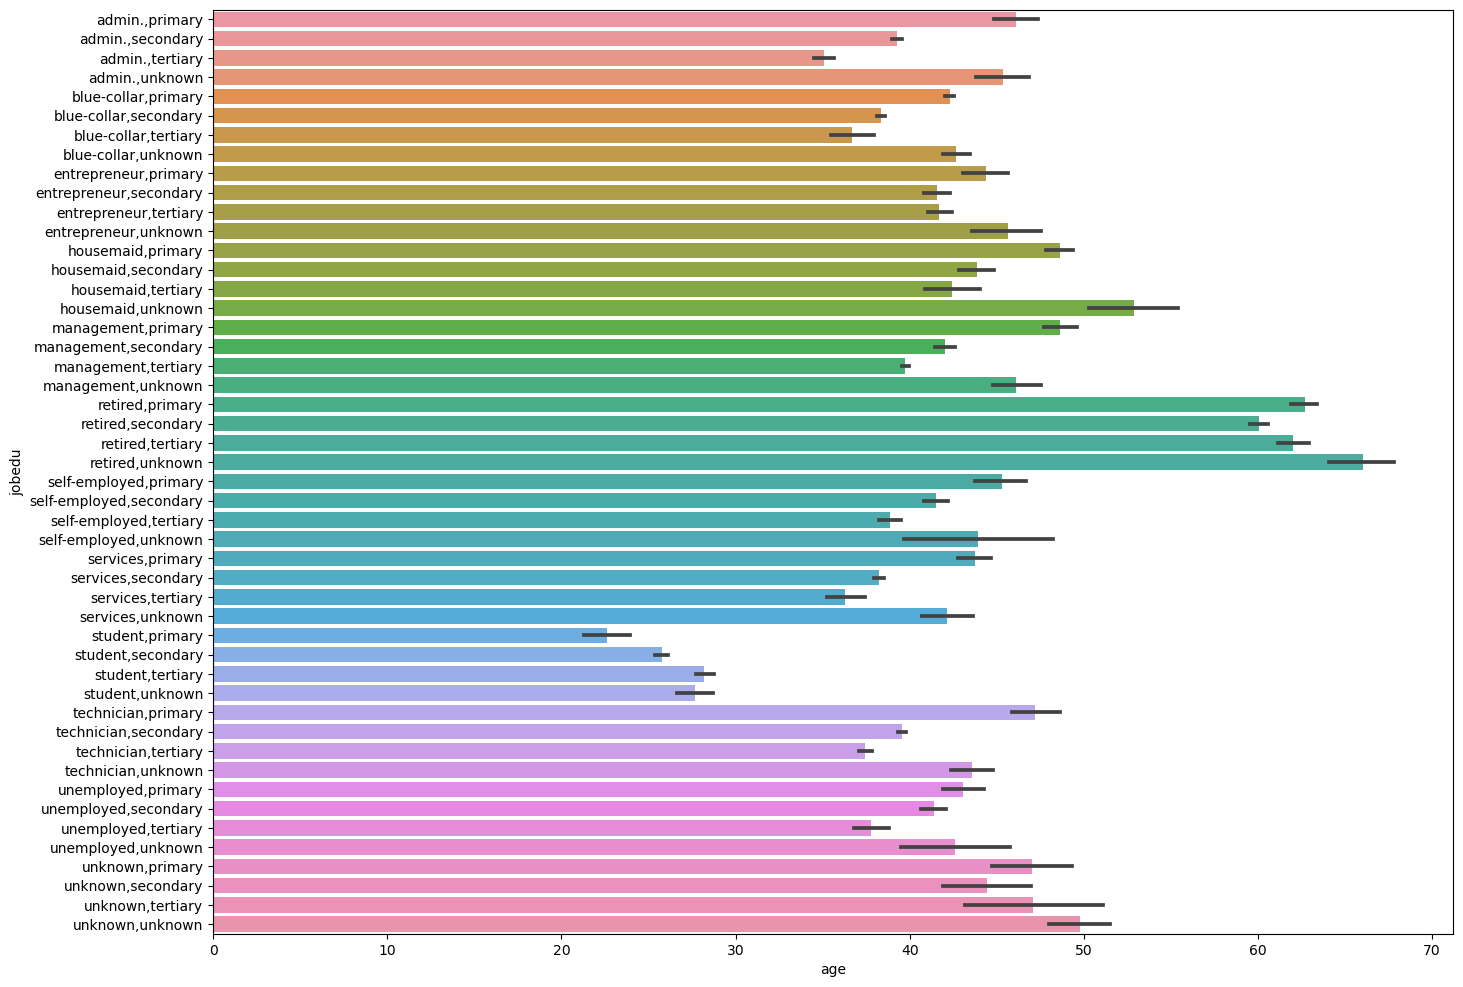

In [32]:
plt.figure(figsize=(16,12))
ax=sns.barplot(data=data,x='age',y='jobedu')
plt.show()

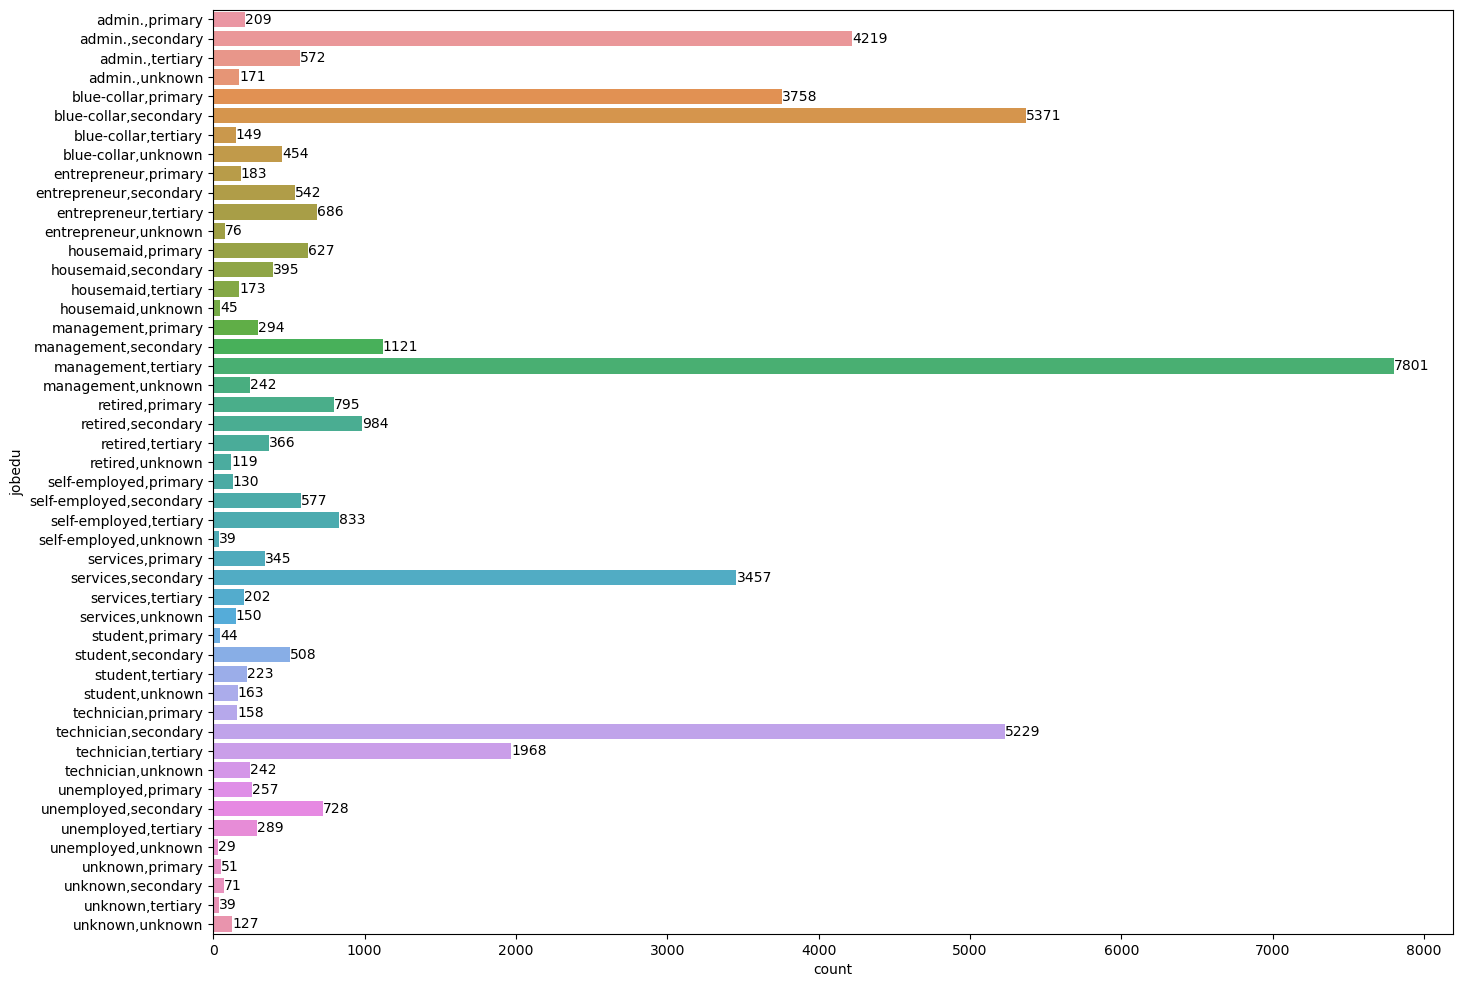

In [33]:
plt.figure(figsize=(16,12))
ax=sns.countplot(data=data,y='jobedu')


for bars in ax.containers:
    ax.bar_label(bars)

*from the above graphs we see that,Most number of customers are working/jobedu in tertiary sector(management),of age not more than 40.

# salary

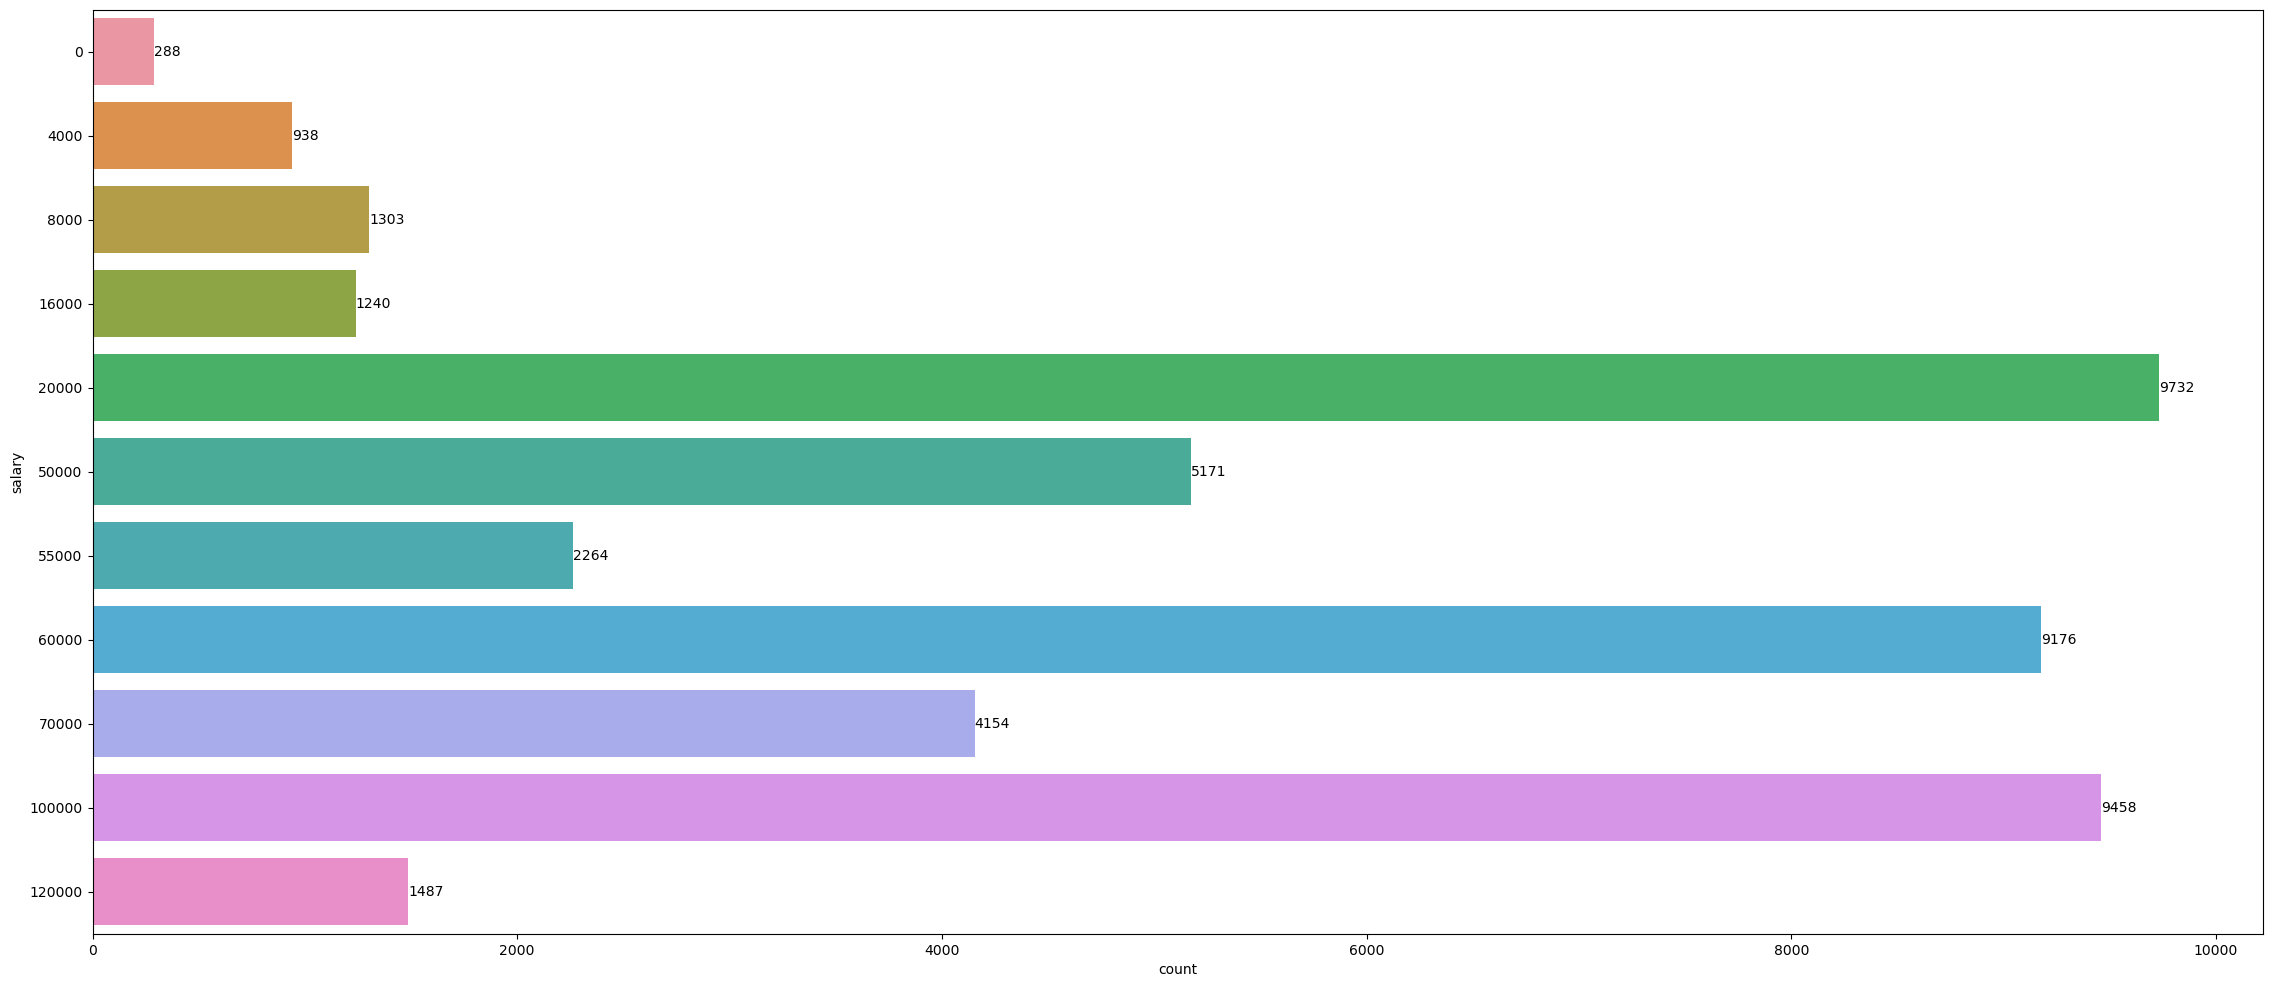

In [34]:
plt.figure(figsize=(28,12))
ax=sns.countplot(data=data,y='salary')

for bars in ax.containers:
    ax.bar_label(bars)

* 288 customers are getting salary ₹ 0.

* 938 customers are getting salary ₹938.

* 1303 customers are getting salary ₹8000.

* 1240 customers are getting salary ₹16000.

* 9372 customers are getting salary ₹20000,(it is also the most no of customers getting salary i.r 20000)

* 5171 customers are getting salary ₹50000.

* 2264 customers are getting salary ₹55000.

* 9176 customers are getting salary ₹60000.

* 4154 customers are getting salary ₹70000.

* 9458 customers are getting slary ₹100000,also the second highest.

* 1487 customers are getting salary ₹120000.



# jobedu and salary

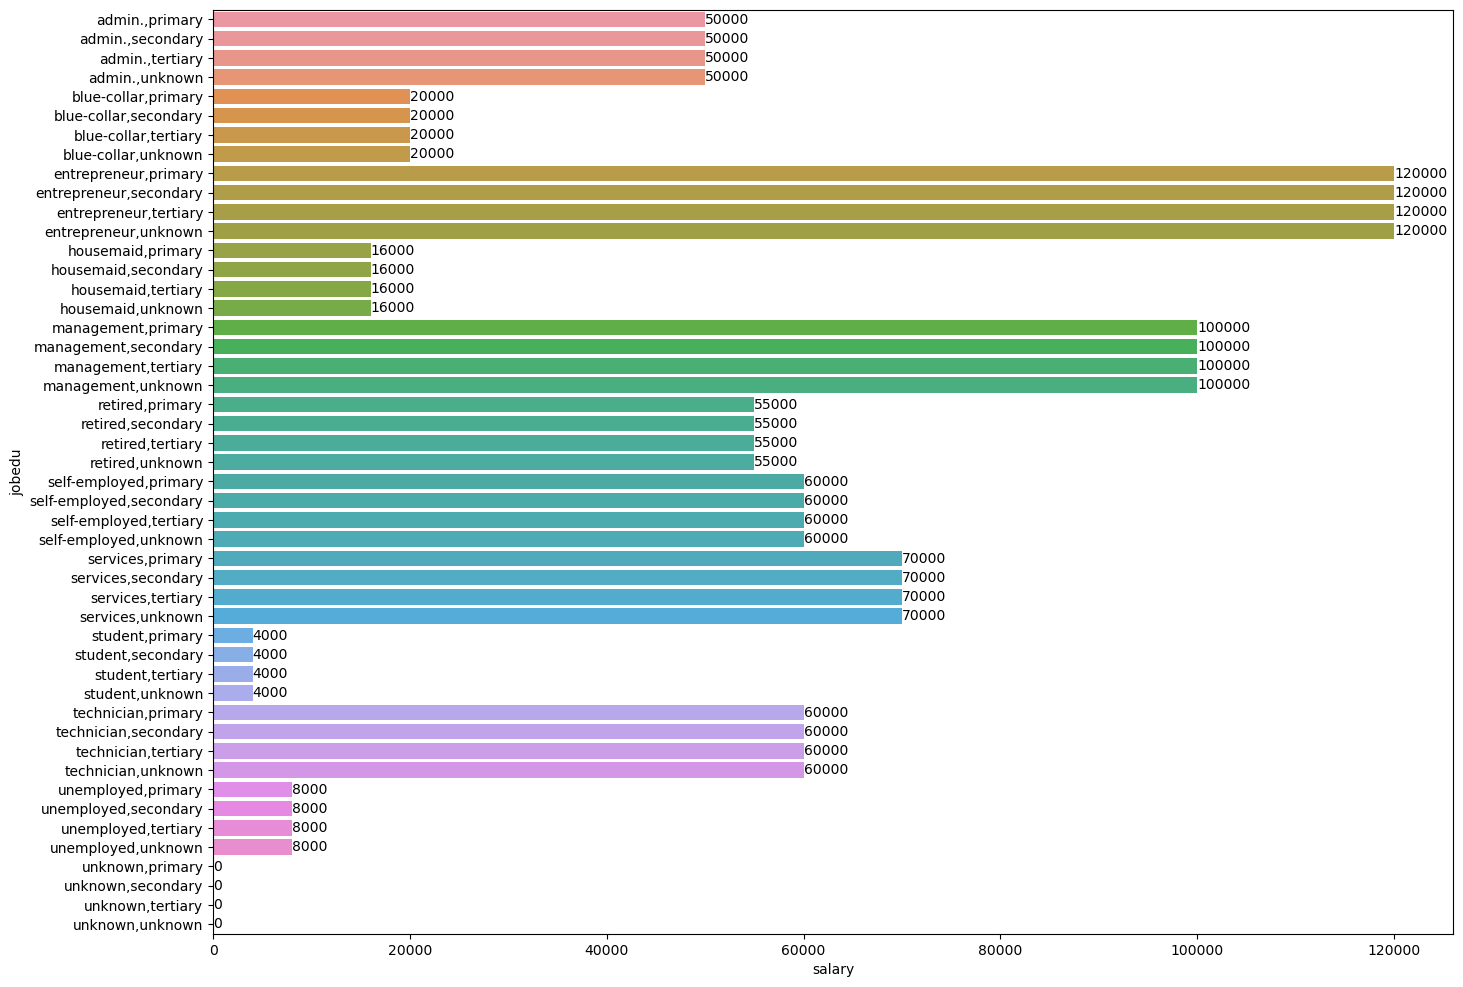

In [35]:
plt.figure(figsize=(16,12))
ax=sns.barplot(y='jobedu',x='salary',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

entrepreneurs are getting highest salary among all the customers with jobedu(entrepreneur),i.e=₹ 1,20,000.

# salary and marital(count wise)

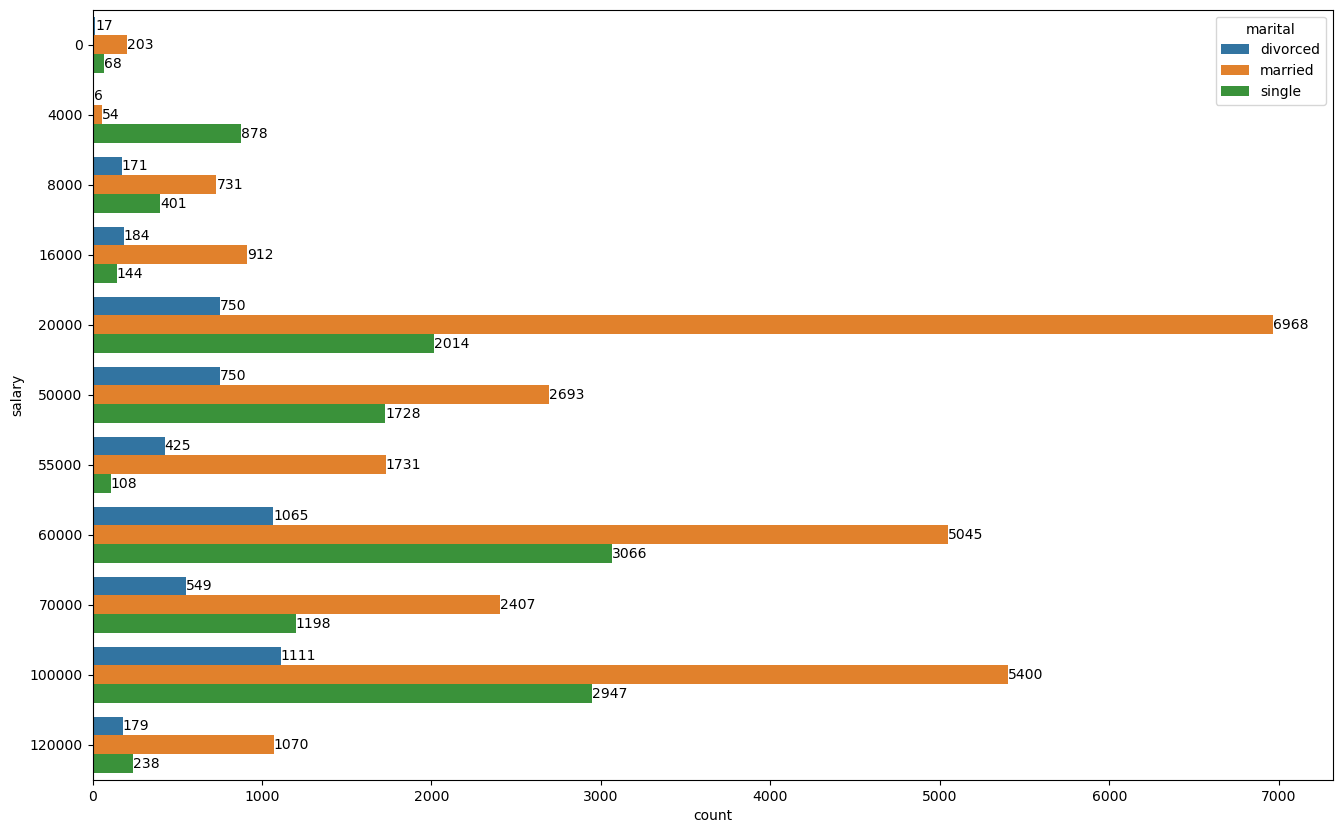

In [36]:
plt.figure(figsize=(16,10))
ax=sns.countplot(data=data,y='salary',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

# default 

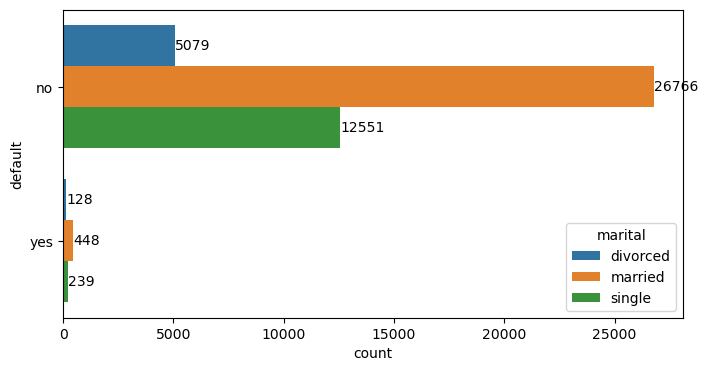

In [37]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data,y='default',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

*  Yes - represents if the customer has defaulted any loan.

*  no  - represents if the customer has not defaulted any loan.

* only 815 customers are those who defaulted to pay any loan.

* the rest 44396 customers are those who are not defaulted to pay any loan.

* In defaulters(815) the highest number are of married(448),then single(239) and then the divorcies(128).

# housing 

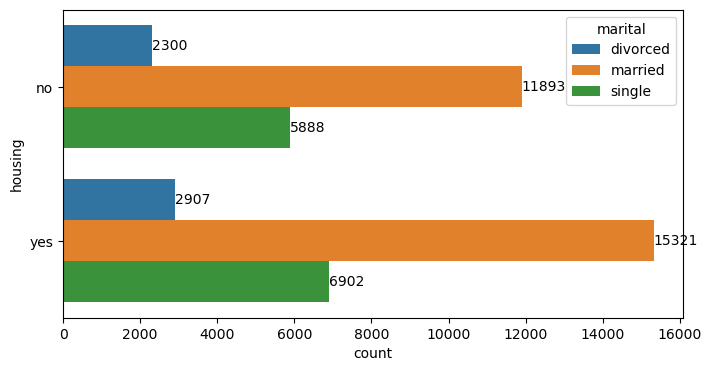

In [38]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data,y='housing',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

*  yes - represents if the customer has taken housing loan.

*  no  - represents if the customer has not taken the housing loan.

* 20081 customers has not taken housing loan.

* 25130 customers has taken housing loan.

* in both cases(yes$no) the most number of people taken housing loan are married.


# loan

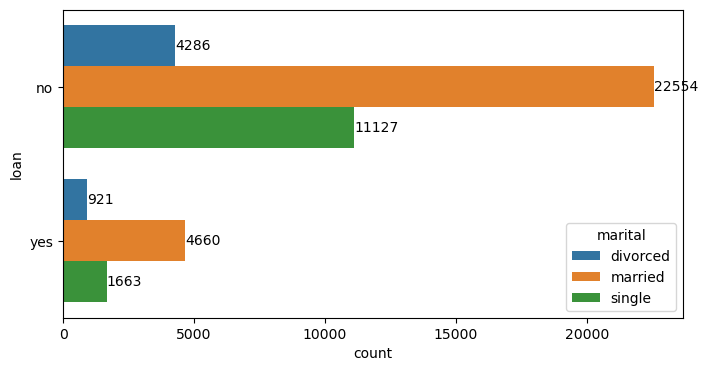

In [39]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data,y='loan',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

* yes - represents if the customer has taken personal loan.

* no  - represents if the customer has not taken the personal loan.

* 37967 customers has not taken personal loan.

* 7244 customers has taken personal loan.

# Contact


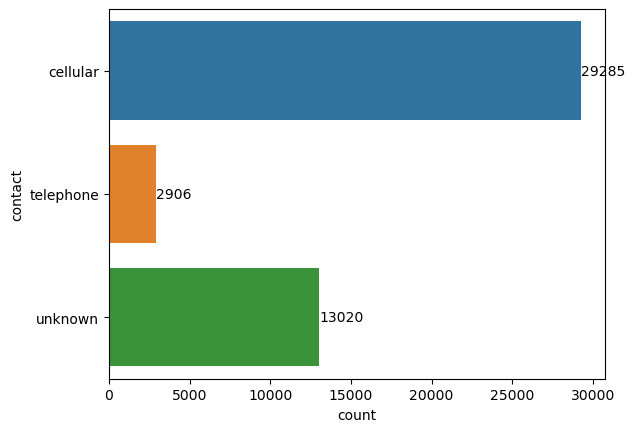

In [40]:
ax=sns.countplot(data=data,y='contact')

for bars in ax.containers:
    ax.bar_label(bars)

# contact w.r.f marital

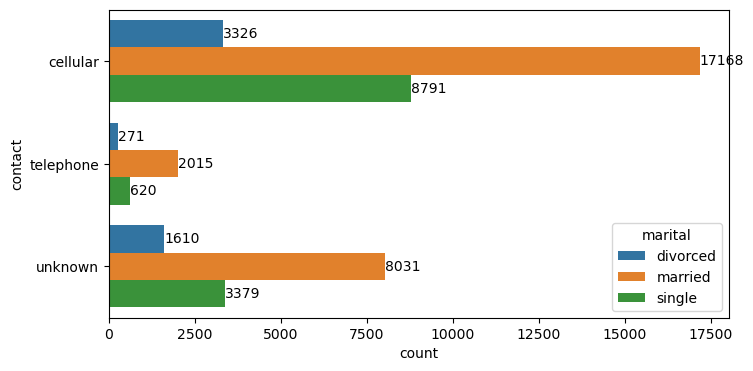

In [41]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data,y='contact',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

* This column provides the information on the means through which the customer has been contacted either ‘cellular’ , ‘telephone’ and ‘unknown’ represents no information.

* 29285 customers has contacted through cellular means.

* 2906 through from telephone means.

* 13030 through unknown means.

# day and month

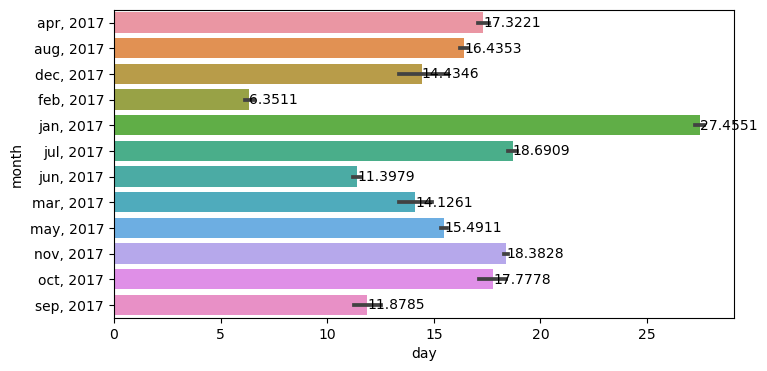

In [42]:
plt.figure(figsize=(8,4))
ax=sns.barplot(data=data,x='day',y='month')

for bars in ax.containers:
    ax.bar_label(bars)

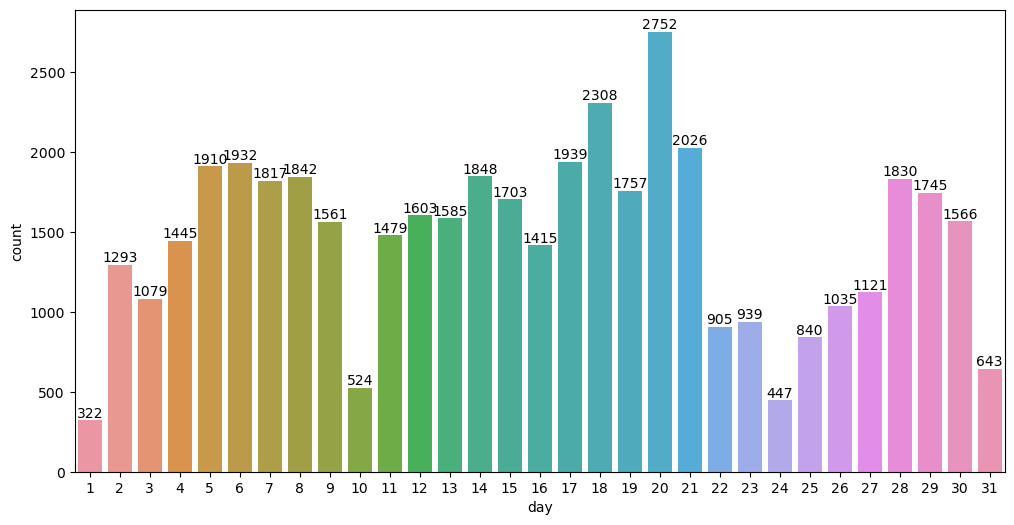

In [43]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=data,x='day')

for bars in ax.containers:
    ax.bar_label(bars)

* day= day of month on which a particular customer is contacted.

* month =This column provides the detail of month in which the customer is contacted during the campaign.

* most customers are contacted on jan,2017.

* and also most customers are contacted on the day 20,i.e 2752

# poutcome

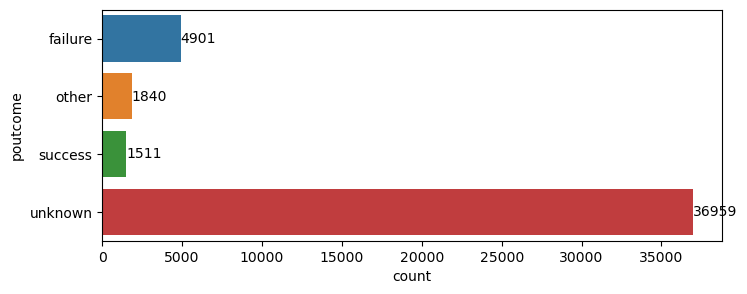

In [44]:
plt.figure(figsize=(8,3))
ax=sns.countplot(data=data,y='poutcome')

for bars in ax.containers:
    ax.bar_label(bars)

* This column represents the outcome of the previous reach outs for any of the products(other than term deposits) provided by banks.  

* Unknown - This represents that the customer has not been reached so far.

* Success - This represents that the previous call was a successful conversion of the customer.

* Failure - This represents that the customer is not interested in the last product.

* Other -  This represents that during the previous call, the customer has not given any definite answer.

* 36959 customers has not been reached so far.

* 1511 customers are successful conversion of the customer.

* 4901 customers is not interested in the last product.

* 1840 customers has not given any definite answer.


# poutcome and marital

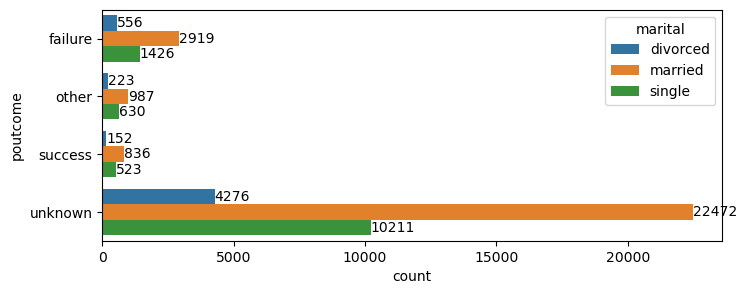

In [45]:
 plt.figure(figsize=(8,3))
ax=sns.countplot(data=data,y='poutcome',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

# Response

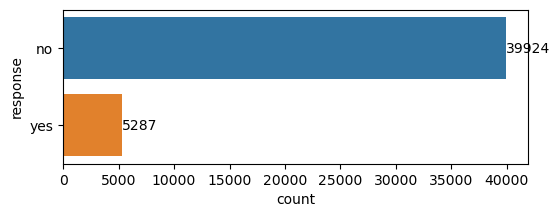

In [46]:
plt.figure(figsize=(6,2))
ax=sns.countplot(data=data,y='response')

for bars in ax.containers:
    ax.bar_label(bars)

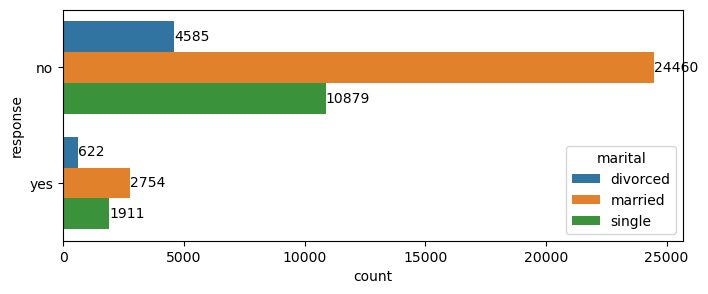

In [47]:
plt.figure(figsize=(8,3))
ax=sns.countplot(data=data,y='response',hue='marital')

for bars in ax.containers:
    ax.bar_label(bars)

* This column represents whether the customer has opened the term deposit account or not.

# Relationship analysis

### *Pairplot 

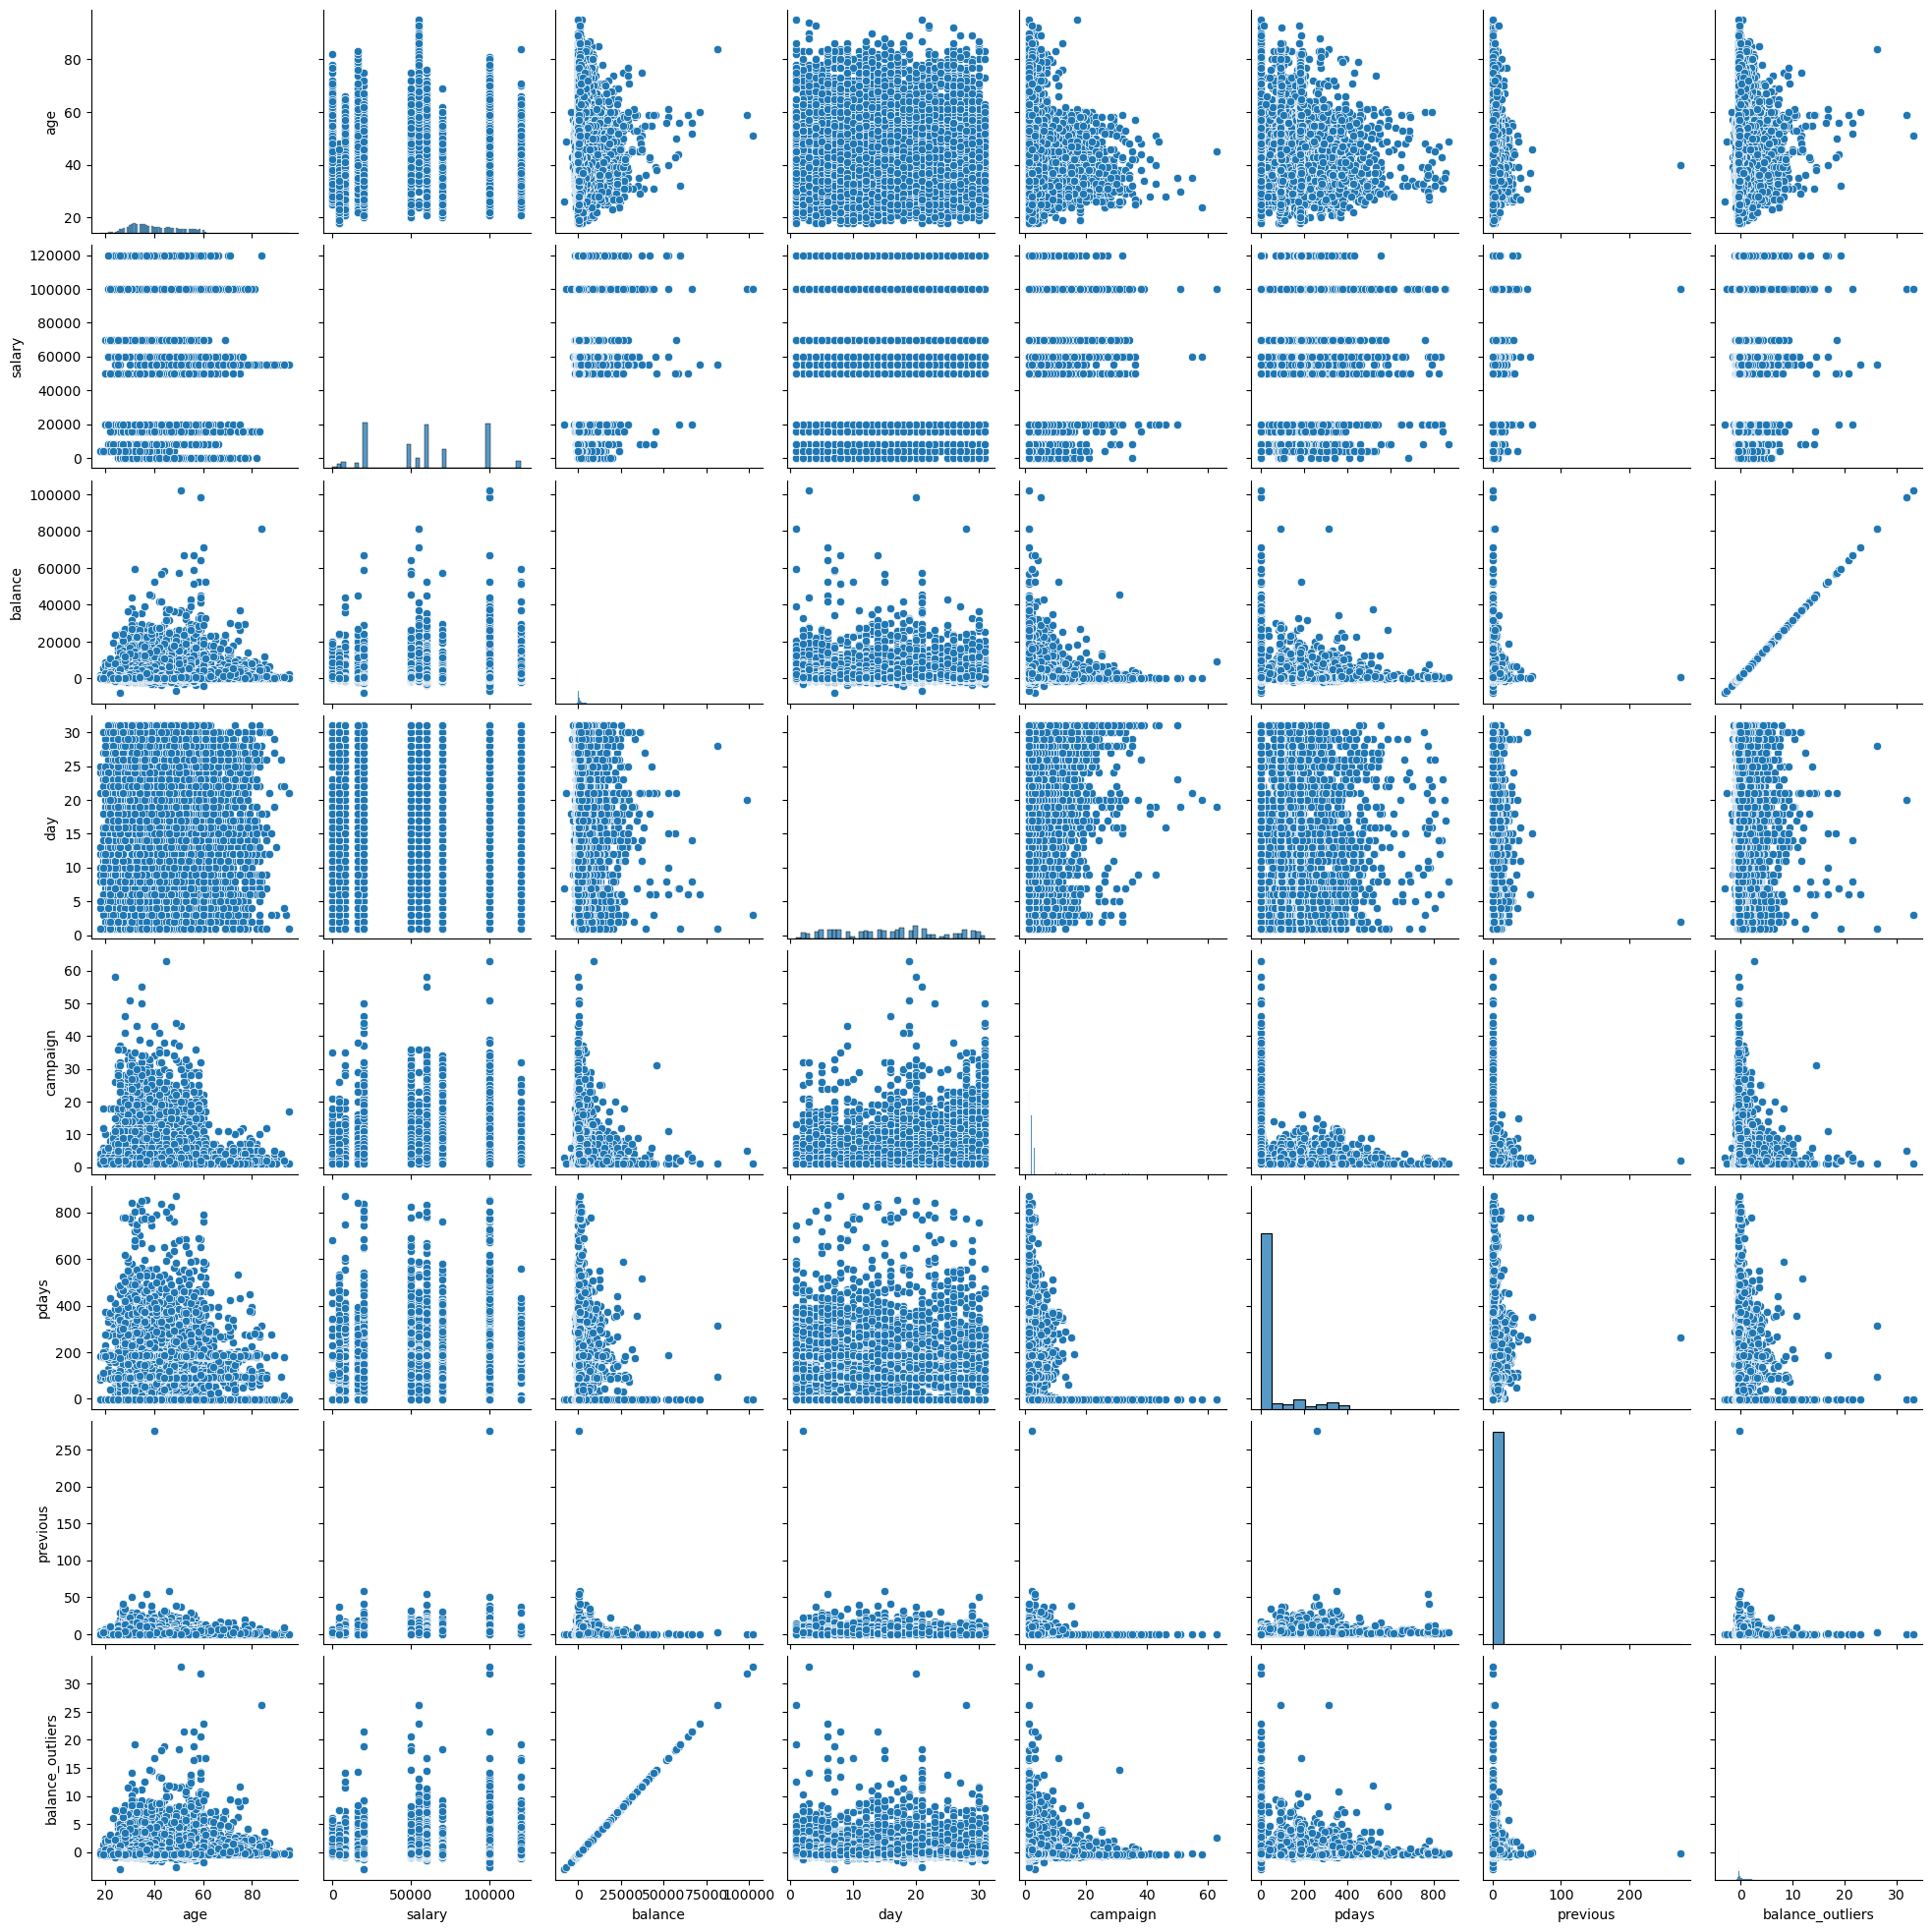

In [48]:
sns.pairplot(data)

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

# * Jointplot

<Figure size 600x200 with 0 Axes>

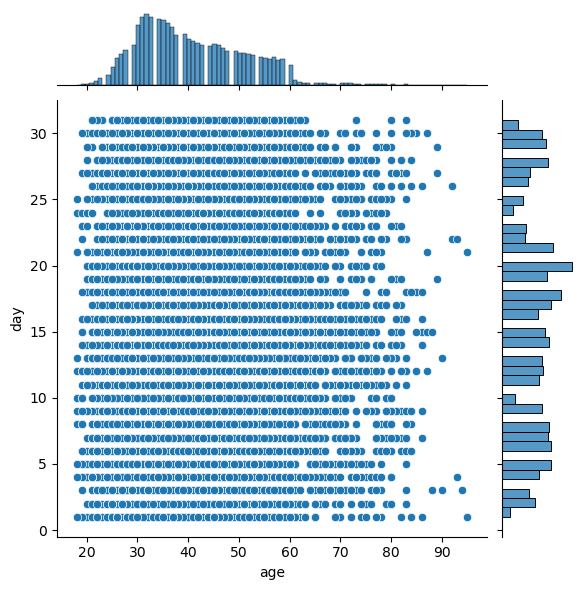

In [49]:
plt.figure(figsize=(6,2))
sns.jointplot(data=data, x="age", y="day")

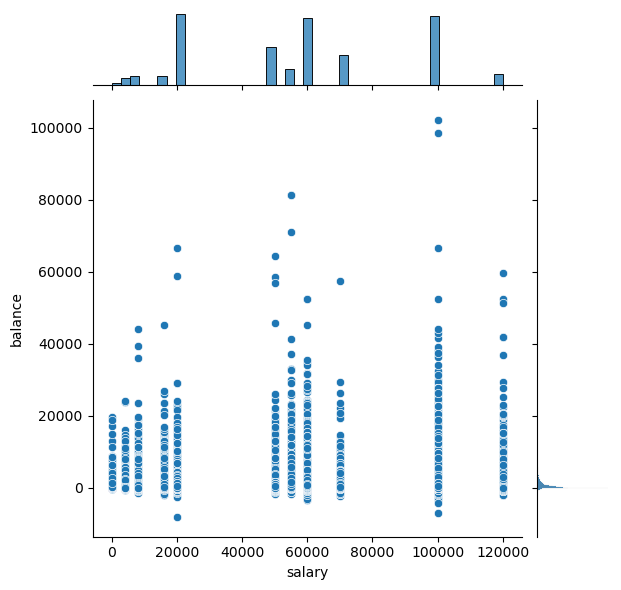

In [50]:
sns.jointplot(data=data, x="salary", y="balance")

<Figure size 600x200 with 0 Axes>

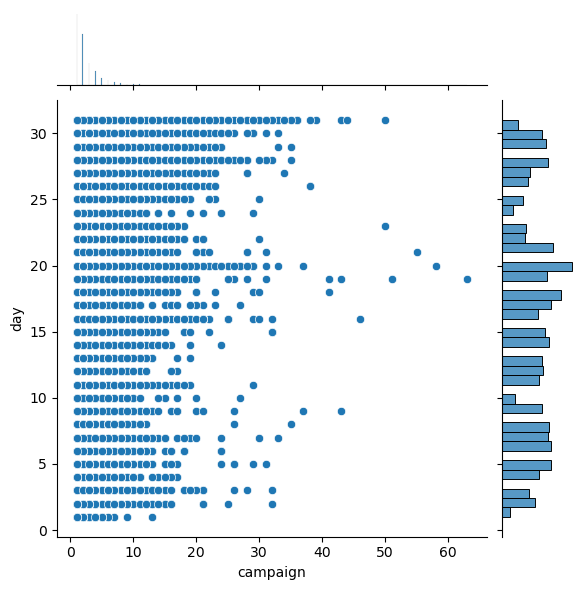

In [51]:
plt.figure(figsize=(6,2))
sns.jointplot(data=data, x="campaign", y="day")

<Figure size 600x200 with 0 Axes>

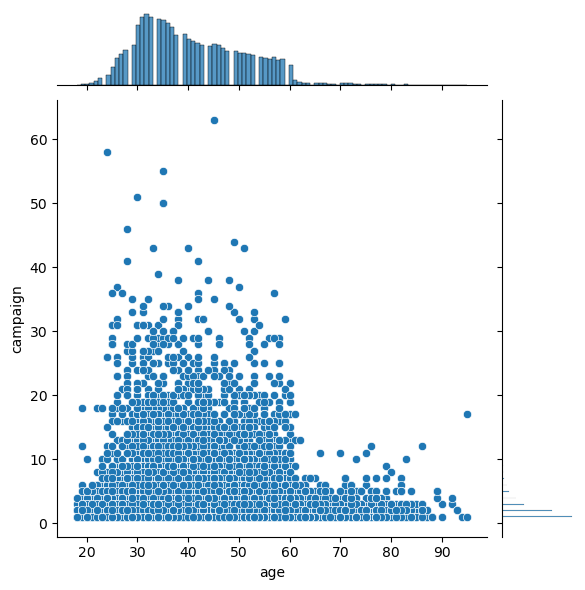

In [52]:
plt.figure(figsize=(6,2))
sns.jointplot(data=data, x="age", y="campaign")

Joint plots allow you to create helpful visuals that plot both a bivariate distribution (such as a scatter plot), as well as the distribution of each of the individual variables.

#### numeric features 

In [53]:
data.select_dtypes(exclude='O').columns.tolist()

['age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'balance_outliers']

In [54]:
# all numeric features
feat_lst = data.select_dtypes(exclude='category').columns.tolist()

# * Boxplot

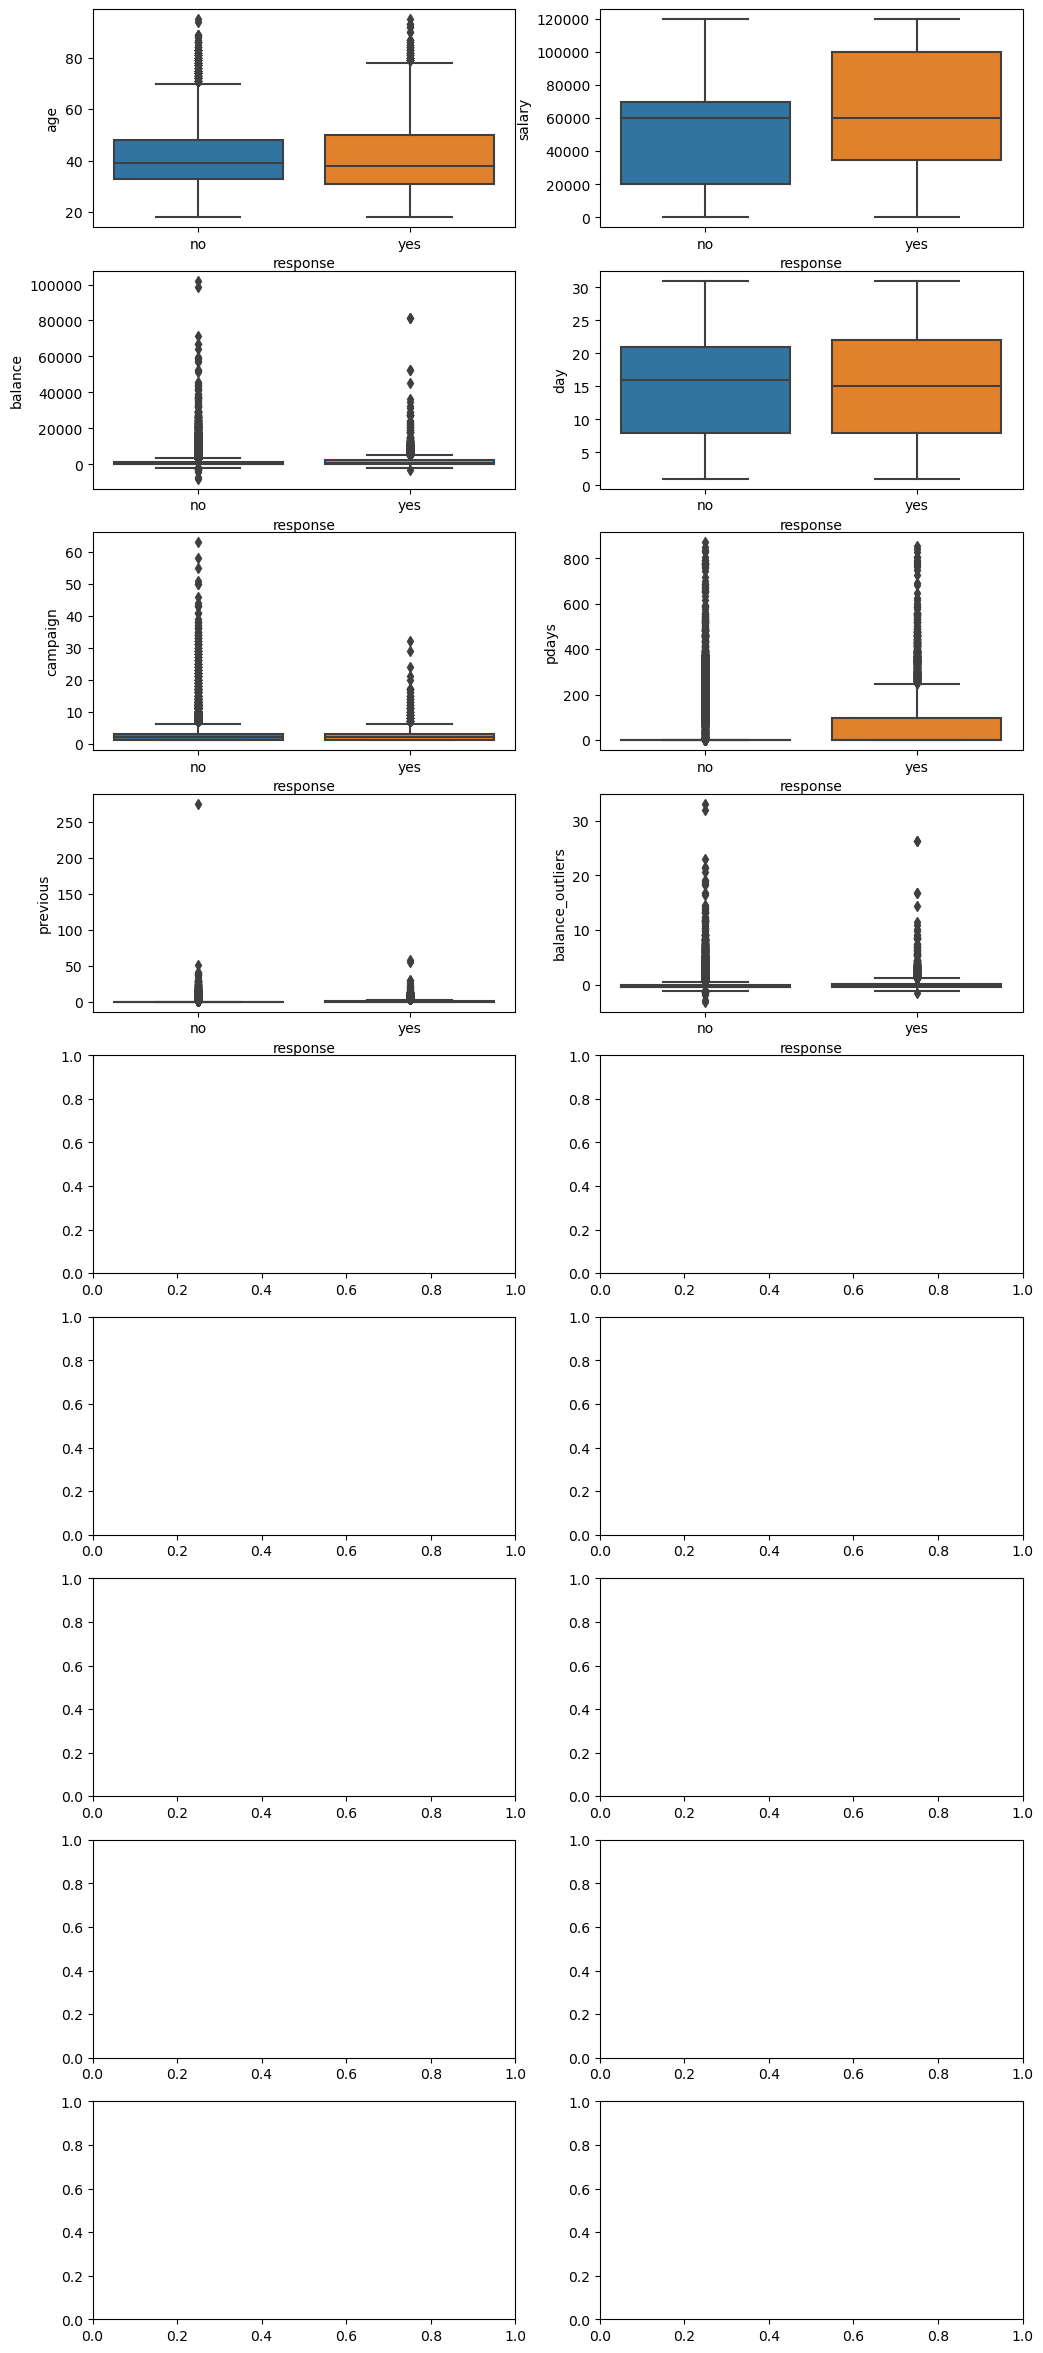

In [55]:
# box plot
fig, axs = plt.subplots(9, 2, figsize = (12, 30))
axs = axs.flatten()
for i, feat in enumerate(feat_lst):
    sns.boxplot(x = 'response', y = feat, data = data,
                ax = axs[i])

## * pearson correlation coefficient matrix

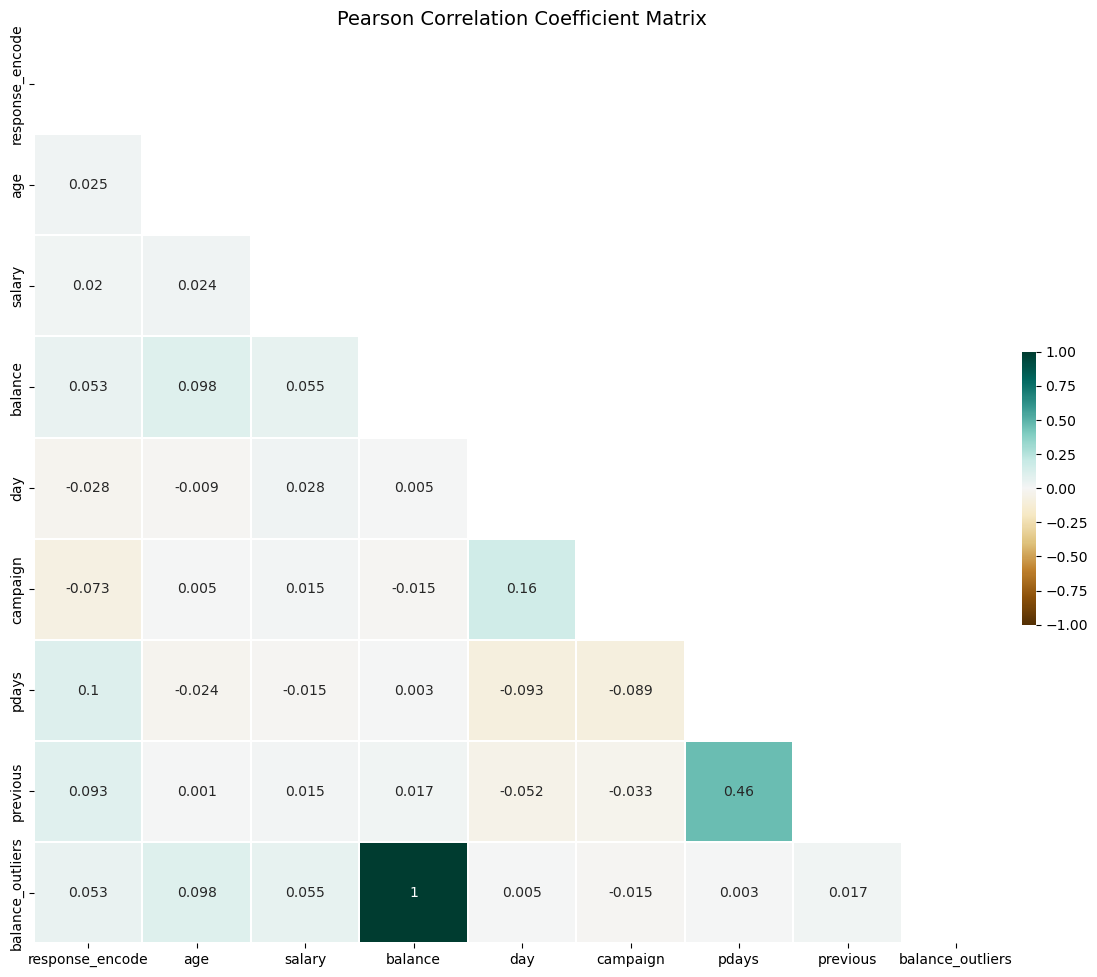

In [56]:
# pearson correlation coefficient matrix
# encode target variable first
df_for_corr = data.copy()
df_for_corr['response_encode'] = df_for_corr.response.replace({'no': 0, 'yes': 1})
feat_corr = df_for_corr[['response_encode'] + feat_lst].corr().round(3)

plt.figure(figsize=(15, 13))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sns.heatmap(feat_corr, mask=mask,
            vmin=-1, vmax=1,
            annot=True, annot_kws={"fontsize": 10},
            cbar=True,
            cbar_kws={'shrink': 0.3, 'pad': 0.01},
            cmap = 'BrBG', linewidth=0.1)
plt.title('Pearson Correlation Coefficient Matrix', fontsize=14)
plt.subplots_adjust(bottom=0.18)

# * Outlier Detection and Treatment

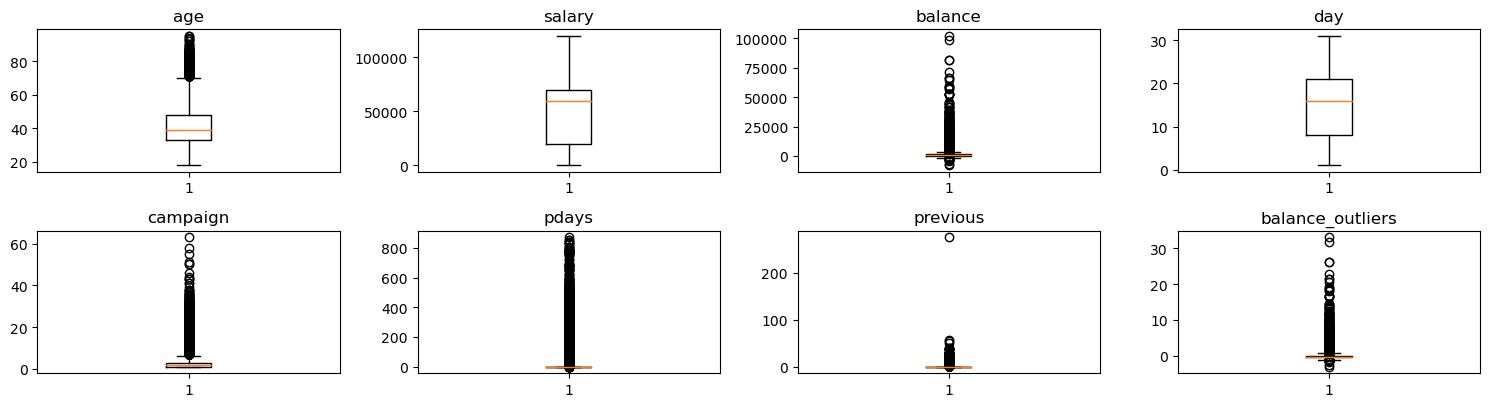

In [57]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.

# outlier treatment

In [58]:
from scipy.stats.mstats import winsorize
data['age']=winsorize(data['age'],limits=[0.1,0.2])
data['balance']=winsorize(data['balance'],limits=[0.1,0.2])
data['campaign']=winsorize(data['campaign'],limits=[0.1,0.2])
data['pdays']=winsorize(data['pdays'],limits=[0.1,0.2])
data['previous']=winsorize(data['previous'],limits=[0.1,0.2])

In [59]:
data['previous'].value_counts()

previous
0    45211
Name: count, dtype: int64

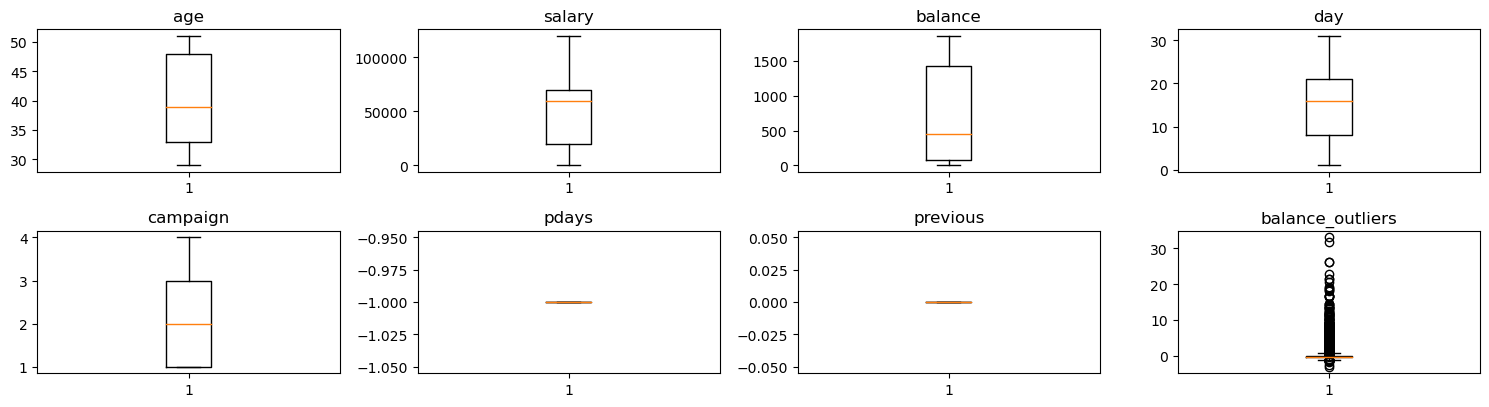

In [60]:
# outlier detection after winzorization
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# lmplot

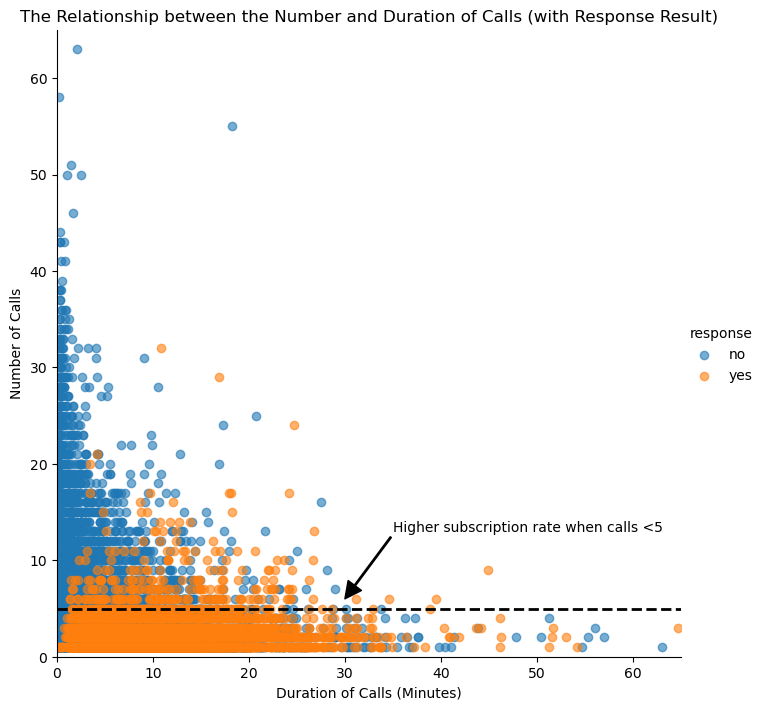

In [61]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset1,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

* more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.
 
* This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.  

## * correlation matrix

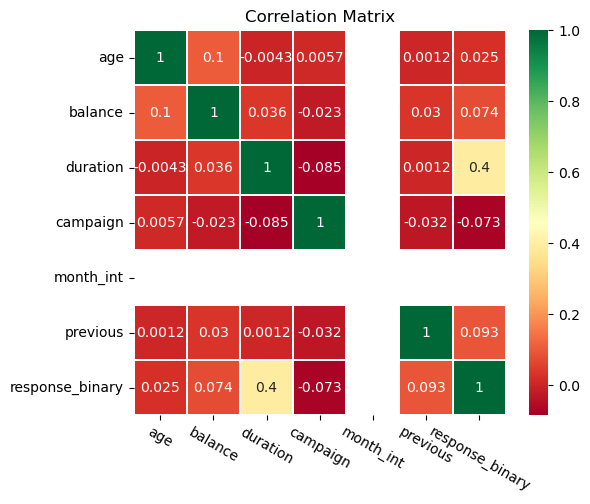

In [62]:
corr_data = dataset1[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

* The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

*  Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. 

* Their influences on campaign outcome will be investigated further in the machine learning part.

## *scatter plot 

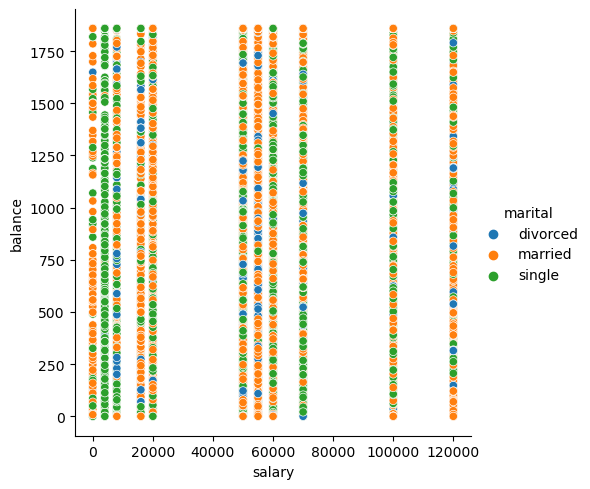

In [63]:
sns.relplot(x='salary',y='balance',hue='marital',data=data)

* most customers have a cash balance in their bank account i.e less than 30k.

* the proportion of married customers are high in balance as well as in salary.

## Data Preparataion for model building 

In [64]:
data['response'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [65]:
#target variable encoding
model = data.copy()
model['response_encode'] = model.response.replace({'no': 0, 'yes': 1})

In [66]:
model.drop('response', axis=1, inplace=True)

In [67]:
model.shape

(45211, 19)

In [68]:
### make sure no missing values exist
model.isna().sum()

age                 0
salary              0
balance             0
marital             0
jobedu              0
targeted            0
default             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
balance_outliers    0
response_encode     0
dtype: int64

### label encoding

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_model=model.apply(LabelEncoder().fit_transform)
new_model.head()

age  salary  balance  marital  jobedu  targeted  default  housing  loan  \
0   22       9     1847        1      18         1        0        1     0   
1   15       7       29        2      37         1        0        1     0   
2    4      10        2        1       9         1        0        1     1   
3   18       4     1504        1       7         0        0        1     0   
4    4       0        1        2      47         0        0        0     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0        2    4      8      1363         0      0         0         3   
1        2    4      8       726         0      0         0         3   
2        2    4      8      2315         0      0         0         3   
3        2    4      8      2585         0      0         0         3   
4        2    4      8      1012         0      0         0         3   

   balance_outliers  response_encode  
0              3036                0  
1               945                0  
2               918                0  
3              2420                0  
4               917                0

In [70]:
new_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   salary            45211 non-null  int64
 2   balance           45211 non-null  int64
 3   marital           45211 non-null  int32
 4   jobedu            45211 non-null  int32
 5   targeted          45211 non-null  int32
 6   default           45211 non-null  int32
 7   housing           45211 non-null  int32
 8   loan              45211 non-null  int32
 9   contact           45211 non-null  int32
 10  day               45211 non-null  int64
 11  month             45211 non-null  int32
 12  duration          45211 non-null  int32
 13  campaign          45211 non-null  int64
 14  pdays             45211 non-null  int64
 15  previous          45211 non-null  int64
 16  poutcome          45211 non-null  int32
 17  balance_outliers  45211 non-nul

now we dont have the need of column i.e balance outlier so we exclude it from out independent variables.

In [71]:
# input
x = new_model.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values

# output
y = new_model.iloc[:,18].values

In [72]:
x.shape

(45211, 17)

In [73]:
y.shape

(45211,)

## Balancing dataset using smote 

In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [75]:
#converting to dataframe
df1=pd.DataFrame(y_sm)
df2=pd.DataFrame(x_sm)
df2

0   1     2   3   4   5   6   7   8   9   10  11    12  13  14  15  16
0      22   9  1847   1  18   1   0   1   0   2   4   8  1363   0   0   0   3
1      15   7    29   2  37   1   0   1   0   2   4   8   726   0   0   0   3
2       4  10     2   1   9   1   0   1   1   2   4   8  2315   0   0   0   3
3      18   4  1504   1   7   0   0   1   0   2   4   8  2585   0   0   0   3
4       4   0     1   2  47   0   0   0   0   2   4   8  1012   0   0   0   3
...    ..  ..   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   ...  ..  ..  ..  ..
79843  10   4     0   1   3   1   0   1   0   0   9   8   530   2   0   0   3
79844   6   7    97   2  31   1   0   0   0   0   4   5  1464   0   0   0   2
79845  19   8   486   1  28   1   0   0   0   0  21   5  1524   0   0   0   2
79846   3   9   950   2  18   0   0   0   0   0  27   0  1105   2   0   0   3
79847  22   4  1847   1   5   1   0   0   0   0  28   9  2196   1   0   0   2

[79848 rows x 17 columns]

In [76]:
#Assigning name  to the column
df1.columns='response_encoded',
#After oversampling the target variable is balanced and ready for modelling
df1.value_counts()

response_encoded
0                   39924
1                   39924
Name: count, dtype: int64

In [77]:
#Providing column names for resampled data
df2.columns='age_encoded','salary_encoded','balance','marital_encoded','jobedu_encoded','targeted_encoded','default_encoded','housing_encoded','loan_encoded','contact_encoded','day','month_encoded','duration_encoded','campaign','pdays_encoded','previous_encoded','poutcome_encoded'
df2

age_encoded  salary_encoded  balance  marital_encoded  jobedu_encoded  \
0               22               9     1847                1              18   
1               15               7       29                2              37   
2                4              10        2                1               9   
3               18               4     1504                1               7   
4                4               0        1                2              47   
...            ...             ...      ...              ...             ...   
79843           10               4        0                1               3   
79844            6               7       97                2              31   
79845           19               8      486                1              28   
79846            3               9      950                2              18   
79847           22               4     1847                1               5   

       targeted_encoded  default_encoded  housing_encoded  loan_encoded  \
0                     1                0                1             0   
1                     1                0                1             0   
2                     1                0                1             1   
3                     0                0                1             0   
4                     0                0                0             0   
...                 ...              ...              ...           ...   
79843                 1                0                1             0   
79844                 1                0                0             0   
79845                 1                0                0             0   
79846                 0                0                0             0   
79847                 1                0                0             0   

       contact_encoded  day  month_encoded  duration_encoded  campaign  \
0                    2    4              8              1363         0   
1                    2    4              8               726         0   
2                    2    4              8              2315         0   
3                    2    4              8              2585         0   
4                    2    4              8              1012         0   
...                ...  ...            ...               ...       ...   
79843                0    9              8               530         2   
79844                0    4              5              1464         0   
79845                0   21              5              1524         0   
79846                0   27              0              1105         2   
79847                0   28              9              2196         1   

       pdays_encoded  previous_encoded  poutcome_encoded  
0                  0                 0                 3  
1                  0                 0                 3  
2                  0                 0                 3  
3                  0                 0                 3  
4                  0                 0                 3  
...              ...               ...               ...  
79843              0                 0                 3  
79844              0                 0                 2  
79845              0                 0                 2  
79846              0                 0                 3  
79847              0                 0                 2  

[79848 rows x 17 columns]

In [78]:
#joining 2 different dataframe together
df3=pd.concat([df1,df2],axis=1)
df3

response_encoded  age_encoded  salary_encoded  balance  \
0                     0           22               9     1847   
1                     0           15               7       29   
2                     0            4              10        2   
3                     0           18               4     1504   
4                     0            4               0        1   
...                 ...          ...             ...      ...   
79843                 1           10               4        0   
79844                 1            6               7       97   
79845                 1           19               8      486   
79846                 1            3               9      950   
79847                 1           22               4     1847   

       marital_encoded  jobedu_encoded  targeted_encoded  default_encoded  \
0                    1              18                 1                0   
1                    2              37                 1                0   
2                    1               9                 1                0   
3                    1               7                 0                0   
4                    2              47                 0                0   
...                ...             ...               ...              ...   
79843                1               3                 1                0   
79844                2              31                 1                0   
79845                1              28                 1                0   
79846                2              18                 0                0   
79847                1               5                 1                0   

       housing_encoded  loan_encoded  contact_encoded  day  month_encoded  \
0                    1             0                2    4              8   
1                    1             0                2    4              8   
2                    1             1                2    4              8   
3                    1             0                2    4              8   
4                    0             0                2    4              8   
...                ...           ...              ...  ...            ...   
79843                1             0                0    9              8   
79844                0             0                0    4              5   
79845                0             0                0   21              5   
79846                0             0                0   27              0   
79847                0             0                0   28              9   

       duration_encoded  campaign  pdays_encoded  previous_encoded  \
0                  1363         0              0                 0   
1                   726         0              0                 0   
2                  2315         0              0                 0   
3                  2585         0              0                 0   
4                  1012         0              0                 0   
...                 ...       ...            ...               ...   
79843               530         2              0                 0   
79844              1464         0              0                 0   
79845              1524         0              0                 0   
79846              1105         2              0                 0   
79847              2196         1              0                 0   

       poutcome_encoded  
0                     3  
1                     3  
2                     3  
3                     3  
4                     3  
...                 ...  
79843                 3  
79844                 2  
79845                 2  
79846                 3  
79847                 2  

[79848 rows x 18 columns]

In [79]:
#Checking the shape of the dataframe
df3.shape

(79848, 18)

In [80]:
# input variables
x=df3.iloc[:,1:19]

# output variable
y = df3.iloc[:, 0].values
x

age_encoded  salary_encoded  balance  marital_encoded  jobedu_encoded  \
0               22               9     1847                1              18   
1               15               7       29                2              37   
2                4              10        2                1               9   
3               18               4     1504                1               7   
4                4               0        1                2              47   
...            ...             ...      ...              ...             ...   
79843           10               4        0                1               3   
79844            6               7       97                2              31   
79845           19               8      486                1              28   
79846            3               9      950                2              18   
79847           22               4     1847                1               5   

       targeted_encoded  default_encoded  housing_encoded  loan_encoded  \
0                     1                0                1             0   
1                     1                0                1             0   
2                     1                0                1             1   
3                     0                0                1             0   
4                     0                0                0             0   
...                 ...              ...              ...           ...   
79843                 1                0                1             0   
79844                 1                0                0             0   
79845                 1                0                0             0   
79846                 0                0                0             0   
79847                 1                0                0             0   

       contact_encoded  day  month_encoded  duration_encoded  campaign  \
0                    2    4              8              1363         0   
1                    2    4              8               726         0   
2                    2    4              8              2315         0   
3                    2    4              8              2585         0   
4                    2    4              8              1012         0   
...                ...  ...            ...               ...       ...   
79843                0    9              8               530         2   
79844                0    4              5              1464         0   
79845                0   21              5              1524         0   
79846                0   27              0              1105         2   
79847                0   28              9              2196         1   

       pdays_encoded  previous_encoded  poutcome_encoded  
0                  0                 0                 3  
1                  0                 0                 3  
2                  0                 0                 3  
3                  0                 0                 3  
4                  0                 0                 3  
...              ...               ...               ...  
79843              0                 0                 3  
79844              0                 0                 2  
79845              0                 0                 2  
79846              0                 0                 3  
79847              0                 0                 2  

[79848 rows x 17 columns]

In [81]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [82]:
df3.corr()['response_encoded']

response_encoded    1.000000
age_encoded        -0.040274
salary_encoded     -0.052547
balance             0.145017
marital_encoded    -0.122036
jobedu_encoded      0.056245
targeted_encoded   -0.265486
default_encoded    -0.081142
housing_encoded    -0.415313
loan_encoded       -0.249658
contact_encoded    -0.346129
day                -0.080369
month_encoded      -0.097200
duration_encoded    0.200401
campaign           -0.273192
pdays_encoded            NaN
previous_encoded         NaN
poutcome_encoded   -0.232137
Name: response_encoded, dtype: float64

In [83]:
### make sure no missing values exist
df3.isna().sum()

response_encoded    0
age_encoded         0
salary_encoded      0
balance             0
marital_encoded     0
jobedu_encoded      0
targeted_encoded    0
default_encoded     0
housing_encoded     0
loan_encoded        0
contact_encoded     0
day                 0
month_encoded       0
duration_encoded    0
campaign            0
pdays_encoded       0
previous_encoded    0
poutcome_encoded    0
dtype: int64

In [84]:
df3.describe().T

count         mean         std  min    25%     50%  \
response_encoded  79848.0     0.500000    0.500003  0.0    0.0     0.5   
age_encoded       79848.0    10.695772    7.849501  0.0    3.0    10.0   
salary_encoded    79848.0     6.143686    2.219155  0.0    4.0     7.0   
balance           79848.0   803.998046  725.272929  0.0  123.0   558.0   
marital_encoded   79848.0     1.084010    0.603430  0.0    1.0     1.0   
jobedu_encoded    79848.0    19.074091   12.466659  0.0    6.0    18.0   
targeted_encoded  79848.0     0.709498    0.453997  0.0    0.0     1.0   
default_encoded   79848.0     0.010745    0.103102  0.0    0.0     0.0   
housing_encoded   79848.0     0.379471    0.485258  0.0    0.0     0.0   
loan_encoded      79848.0     0.095832    0.294363  0.0    0.0     0.0   
contact_encoded   79848.0     0.420912    0.773694  0.0    0.0     0.0   
day               79848.0    14.257339    7.897132  0.0    8.0    14.0   
month_encoded     79848.0     5.264327    2.959864  0.0    3.0     6.0   
duration_encoded  79848.0  1243.808787  764.199689  0.0  578.0  1373.0   
campaign          79848.0     0.907136    1.053698  0.0    0.0     1.0   
pdays_encoded     79848.0     0.000000    0.000000  0.0    0.0     0.0   
previous_encoded  79848.0     0.000000    0.000000  0.0    0.0     0.0   
poutcome_encoded  79848.0     2.353847    1.008762  0.0    2.0     3.0   

                     75%     max  
response_encoded     1.0     1.0  
age_encoded         19.0    22.0  
salary_encoded       8.0    10.0  
balance           1728.0  1847.0  
marital_encoded      1.0     2.0  
jobedu_encoded      29.0    47.0  
targeted_encoded     1.0     1.0  
default_encoded      0.0     1.0  
housing_encoded      1.0     1.0  
loan_encoded         0.0     1.0  
contact_encoded      0.0     2.0  
day                 20.0    30.0  
month_encoded        8.0    11.0  
duration_encoded  1862.0  2645.0  
campaign             2.0     3.0  
pdays_encoded        0.0     0.0  
previous_encoded     0.0     0.0  
poutcome_encoded     3.0     3.0

In [85]:
#This is done to help to know the index number of each column make iloc slicing easy.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   response_encoded  79848 non-null  int64
 1   age_encoded       79848 non-null  int64
 2   salary_encoded    79848 non-null  int64
 3   balance           79848 non-null  int64
 4   marital_encoded   79848 non-null  int64
 5   jobedu_encoded    79848 non-null  int64
 6   targeted_encoded  79848 non-null  int64
 7   default_encoded   79848 non-null  int64
 8   housing_encoded   79848 non-null  int64
 9   loan_encoded      79848 non-null  int64
 10  contact_encoded   79848 non-null  int64
 11  day               79848 non-null  int64
 12  month_encoded     79848 non-null  int64
 13  duration_encoded  79848 non-null  int64
 14  campaign          79848 non-null  int64
 15  pdays_encoded     79848 non-null  int64
 16  previous_encoded  79848 non-null  int64
 17  poutcome_encoded  79848 non-nul

In [86]:
#Scaling using StandardScaler(Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df3.iloc[:,[3,13]])
df_scaled = pd.DataFrame(scaled)
df_scaled

0         1
0      1.438091  0.155970
1     -1.068567 -0.677587
2     -1.105795  1.401725
3      0.965163  1.755038
4     -1.107174 -0.303337
...         ...       ...
79843 -1.108552 -0.934066
79844 -0.974809  0.288135
79845 -0.438456  0.366649
79846  0.201307 -0.181641
79847  1.438091  1.246006

[79848 rows x 2 columns]

In [87]:
#Providing column names for scaled columns
df_scaled.columns='balance','duration'
df_scaled

balance  duration
0      1.438091  0.155970
1     -1.068567 -0.677587
2     -1.105795  1.401725
3      0.965163  1.755038
4     -1.107174 -0.303337
...         ...       ...
79843 -1.108552 -0.934066
79844 -0.974809  0.288135
79845 -0.438456  0.366649
79846  0.201307 -0.181641
79847  1.438091  1.246006

[79848 rows x 2 columns]

In [88]:
#Dropping  column
df4=df3.drop(['balance','duration_encoded'],axis=1)
df4

response_encoded  age_encoded  salary_encoded  marital_encoded  \
0                     0           22               9                1   
1                     0           15               7                2   
2                     0            4              10                1   
3                     0           18               4                1   
4                     0            4               0                2   
...                 ...          ...             ...              ...   
79843                 1           10               4                1   
79844                 1            6               7                2   
79845                 1           19               8                1   
79846                 1            3               9                2   
79847                 1           22               4                1   

       jobedu_encoded  targeted_encoded  default_encoded  housing_encoded  \
0                  18                 1                0                1   
1                  37                 1                0                1   
2                   9                 1                0                1   
3                   7                 0                0                1   
4                  47                 0                0                0   
...               ...               ...              ...              ...   
79843               3                 1                0                1   
79844              31                 1                0                0   
79845              28                 1                0                0   
79846              18                 0                0                0   
79847               5                 1                0                0   

       loan_encoded  contact_encoded  day  month_encoded  campaign  \
0                 0                2    4              8         0   
1                 0                2    4              8         0   
2                 1                2    4              8         0   
3                 0                2    4              8         0   
4                 0                2    4              8         0   
...             ...              ...  ...            ...       ...   
79843             0                0    9              8         2   
79844             0                0    4              5         0   
79845             0                0   21              5         0   
79846             0                0   27              0         2   
79847             0                0   28              9         1   

       pdays_encoded  previous_encoded  poutcome_encoded  
0                  0                 0                 3  
1                  0                 0                 3  
2                  0                 0                 3  
3                  0                 0                 3  
4                  0                 0                 3  
...              ...               ...               ...  
79843              0                 0                 3  
79844              0                 0                 2  
79845              0                 0                 2  
79846              0                 0                 3  
79847              0                 0                 2  

[79848 rows x 16 columns]

In [89]:
#joining 2 different dataframe togather(df4+df_scaled)
df5=pd.concat([df4,df_scaled],axis=1)
df5

response_encoded  age_encoded  salary_encoded  marital_encoded  \
0                     0           22               9                1   
1                     0           15               7                2   
2                     0            4              10                1   
3                     0           18               4                1   
4                     0            4               0                2   
...                 ...          ...             ...              ...   
79843                 1           10               4                1   
79844                 1            6               7                2   
79845                 1           19               8                1   
79846                 1            3               9                2   
79847                 1           22               4                1   

       jobedu_encoded  targeted_encoded  default_encoded  housing_encoded  \
0                  18                 1                0                1   
1                  37                 1                0                1   
2                   9                 1                0                1   
3                   7                 0                0                1   
4                  47                 0                0                0   
...               ...               ...              ...              ...   
79843               3                 1                0                1   
79844              31                 1                0                0   
79845              28                 1                0                0   
79846              18                 0                0                0   
79847               5                 1                0                0   

       loan_encoded  contact_encoded  day  month_encoded  campaign  \
0                 0                2    4              8         0   
1                 0                2    4              8         0   
2                 1                2    4              8         0   
3                 0                2    4              8         0   
4                 0                2    4              8         0   
...             ...              ...  ...            ...       ...   
79843             0                0    9              8         2   
79844             0                0    4              5         0   
79845             0                0   21              5         0   
79846             0                0   27              0         2   
79847             0                0   28              9         1   

       pdays_encoded  previous_encoded  poutcome_encoded   balance  duration  
0                  0                 0                 3  1.438091  0.155970  
1                  0                 0                 3 -1.068567 -0.677587  
2                  0                 0                 3 -1.105795  1.401725  
3                  0                 0                 3  0.965163  1.755038  
4                  0                 0                 3 -1.107174 -0.303337  
...              ...               ...               ...       ...       ...  
79843              0                 0                 3 -1.108552 -0.934066  
79844              0                 0                 2 -0.974809  0.288135  
79845              0                 0                 2 -0.438456  0.366649  
79846              0                 0                 3  0.201307 -0.181641  
79847              0                 0                 2  1.438091  1.246006  

[79848 rows x 18 columns]

In [90]:
#Analysing the statistical values of all the numerical features
df5.describe().T

count          mean        std       min       25%  \
response_encoded  79848.0  5.000000e-01   0.500003  0.000000  0.000000   
age_encoded       79848.0  1.069577e+01   7.849501  0.000000  3.000000   
salary_encoded    79848.0  6.143686e+00   2.219155  0.000000  4.000000   
marital_encoded   79848.0  1.084010e+00   0.603430  0.000000  1.000000   
jobedu_encoded    79848.0  1.907409e+01  12.466659  0.000000  6.000000   
targeted_encoded  79848.0  7.094980e-01   0.453997  0.000000  0.000000   
default_encoded   79848.0  1.074542e-02   0.103102  0.000000  0.000000   
housing_encoded   79848.0  3.794710e-01   0.485258  0.000000  0.000000   
loan_encoded      79848.0  9.583208e-02   0.294363  0.000000  0.000000   
contact_encoded   79848.0  4.209122e-01   0.773694  0.000000  0.000000   
day               79848.0  1.425734e+01   7.897132  0.000000  8.000000   
month_encoded     79848.0  5.264327e+00   2.959864  0.000000  3.000000   
campaign          79848.0  9.071361e-01   1.053698  0.000000  0.000000   
pdays_encoded     79848.0  0.000000e+00   0.000000  0.000000  0.000000   
previous_encoded  79848.0  0.000000e+00   0.000000  0.000000  0.000000   
poutcome_encoded  79848.0  2.353847e+00   1.008762  0.000000  2.000000   
balance           79848.0  3.417098e-17   1.000006 -1.108552 -0.938960   
duration          79848.0  1.452266e-16   1.000006 -1.627607 -0.871255   

                        50%        75%        max  
response_encoded   0.500000   1.000000   1.000000  
age_encoded       10.000000  19.000000  22.000000  
salary_encoded     7.000000   8.000000  10.000000  
marital_encoded    1.000000   1.000000   2.000000  
jobedu_encoded    18.000000  29.000000  47.000000  
targeted_encoded   1.000000   1.000000   1.000000  
default_encoded    0.000000   0.000000   1.000000  
housing_encoded    0.000000   1.000000   1.000000  
loan_encoded       0.000000   0.000000   1.000000  
contact_encoded    0.000000   0.000000   2.000000  
day               14.000000  20.000000  30.000000  
month_encoded      6.000000   8.000000  11.000000  
campaign           1.000000   2.000000   3.000000  
pdays_encoded      0.000000   0.000000   0.000000  
previous_encoded   0.000000   0.000000   0.000000  
poutcome_encoded   3.000000   3.000000   3.000000  
balance           -0.339182   1.274014   1.438091  
duration           0.169055   0.808944   1.833552

## <h1><center>Model Building</center></h1>

In [91]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(df5.shape ,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(79848, 18) (63878, 17) (15970, 17) (63878,) (15970,)


* The Original dataset comprises 79,848 rows and consists of 18 columns.

* A subset of 63,878 rows and 17 columns representing independent variables is allocated for training.The training dataset encompasses 63,878 rows for the dependent variable.

* For testing purposes, 15,970 rows and 17 columns of independent variables and dependent variable are selected from the dataset.

### training the model

In [92]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10 ,random_state=0)

In [93]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=0)

## feature importance

In [94]:
clf.feature_importances_

array([0.00943664, 0.01897017, 0.0085684 , 0.01310208, 0.0210211 ,
       0.04882685, 0.00033686, 0.18851036, 0.04936406, 0.1322497 ,
       0.01121015, 0.03903244, 0.18304459, 0.06687586, 0.        ,
       0.        , 0.20945072])

In [95]:
df5.columns

Index(['response_encoded', 'age_encoded', 'salary_encoded', 'marital_encoded',
       'jobedu_encoded', 'targeted_encoded', 'default_encoded',
       'housing_encoded', 'loan_encoded', 'contact_encoded', 'day',
       'month_encoded', 'campaign', 'pdays_encoded', 'previous_encoded',
       'poutcome_encoded', 'balance', 'duration'],
      dtype='object')

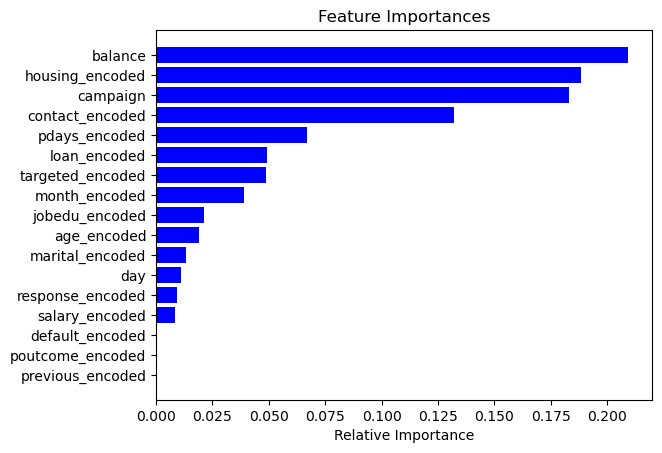

In [96]:
features=df5.columns
importances=clf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Understanding feature importance helps to identify which features are most influential in making predictions or decisions.


## prediction

In [97]:
y_pred=clf.predict(X_test)

In [98]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [99]:
#Creating dataframe for both actual prediction and predication based on test data.
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test

actual  Pred
0           0     0
1           1     1
2           0     0
3           0     1
4           0     0
...       ...   ...
15965       0     0
15966       1     0
15967       0     0
15968       0     0
15969       0     1

[15970 rows x 2 columns]

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6609, 1295],
       [ 976, 7090]], dtype=int64)

In [101]:
#Accuracy Score calculated using formula  (TP+TN)/(TP+TN+FP+FN)
(6649+7078)/(6649+1255+988+7078)

0.8595491546649968

In [102]:
from sklearn.metrics import accuracy_score,classification_report

In [103]:
accuracy_score(y_test,y_pred)

0.8577958672510958

* The accuracy score of the model's predictions on the testing data, providing an indication of how well the model performs in terms of overall correctness.

* Higher accuracy scores indicate better performance, with 1.0 representing perfect accuracy and 0.0 representing no accuracy.

* Here the accuracy score=0.8577958672510958 representing moderate rate of accuracy made by a classification model prediction on a test dataset.

In [104]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7585
           1       0.88      0.85      0.86      8385

    accuracy                           0.86     15970
   macro avg       0.86      0.86      0.86     15970
weighted avg       0.86      0.86      0.86     15970



* A classification report typically includes the following metrics Precision, recall, f1-score, support.

* Each metric in the classification report provides insights into different aspects of the models performance. It helps in evaluating the models effectiveness in classifying instances into different classes.

# Decision tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
treemodel=DecisionTreeClassifier(max_depth=2)

In [107]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.5\nsamples = 63878\nvalue = [32020, 31858]'),
 Text(0.25, 0.5, 'x[16] <= 2.5\ngini = 0.448\nsamples = 39630\nvalue = [13445, 26185]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.165\nsamples = 16605\nvalue = [1504, 15101]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 23025\nvalue = [11941, 11084]'),
 Text(0.75, 0.5, 'x[16] <= 2.5\ngini = 0.358\nsamples = 24248\nvalue = [18575, 5673]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.486\nsamples = 6088\nvalue = [3561, 2527]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.286\nsamples = 18160\nvalue = [15014, 3146]')]

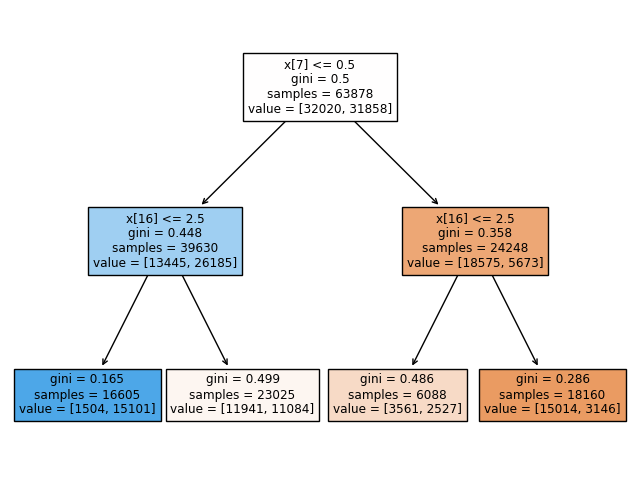

In [108]:
from sklearn import tree
plt.figure(figsize=(8,6))
tree.plot_tree(treemodel,filled=True)

# Roc curve

In [109]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(y_pred,y_test)

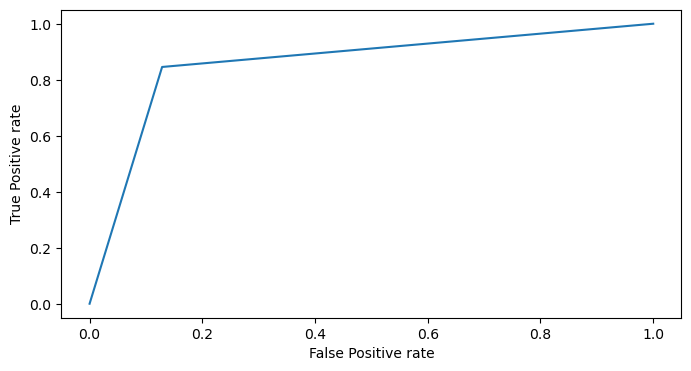

In [110]:
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [111]:
#Prediction on train data
Y_pred_train = clf.predict(X_train)

In [112]:
#Confusion matrix
cm_train=confusion_matrix(Y_pred_train,y_train)
print ("Confusion Matrix : \n", cm_train)


Confusion Matrix : 
 [[27058  3764]
 [ 4962 28094]]


In [113]:
#Accuracy Score  train
print("Accuracy Score:",accuracy_score(Y_pred_train,y_train))

Accuracy Score: 0.8633958483358903


* The accuracy score of the models predictions on the training data, providing an indication of how well the model performs in terms of overall correctness on the data it was trained on..

* Higher accuracy scores indicate better performance, with 1.0 representing perfect accuracy and 0.0 representing no accuracy.

* Here the accuracy score=0.8633 representing more than moderate rate of accuracy made by a classification model prediction on train dataset.

In [114]:
#Train data classifcation report
cm_class_train=classification_report(Y_pred_train,y_train)
print(cm_class_train)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     30822
           1       0.88      0.85      0.87     33056

    accuracy                           0.86     63878
   macro avg       0.86      0.86      0.86     63878
weighted avg       0.86      0.86      0.86     63878



In [115]:
#PLotting ROC(Reciver Operating Charecteristic curve) curve
# A higher ROC value (closer to 1.0) indicates better overall performance.
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)

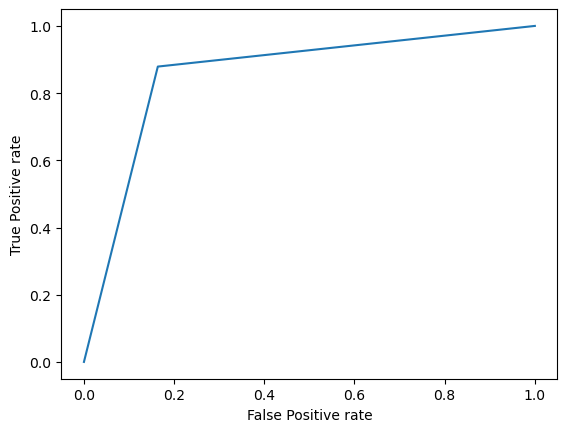

In [116]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

# Conclusion and recommendations

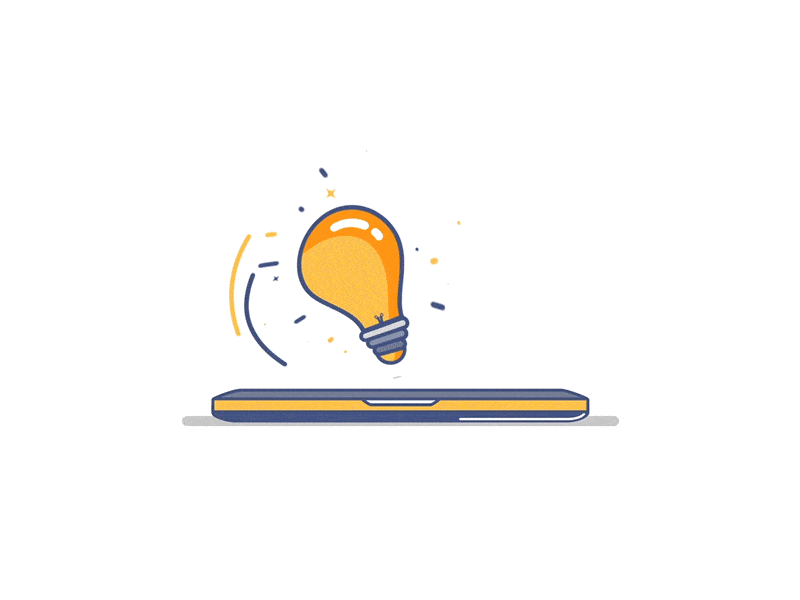